# Project 1: Ames Housing EDA Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

To create a regression based model to predict the **housing price using the Ames Housing Dataset**.

[Link to data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

## Executive Summary

Backstory behind the Ames housing data set

## Go straight to Exploratory Data Analysis


### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Rename the columns](#Rename-Columns)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Import graph style
plt.style.use('fivethirtyeight')

In [3]:
# Set the max rows and columns for Pandas
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

## Data Import and Cleaning

#### 1. Read In Data

Read in the`.csv` files

In [4]:
# Open the training set CSV data files
train_df = pd.read_csv('../datasets/train.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe

In [383]:
# View first 10 rows
train_df.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [384]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

#### Data Description

Answer: 

The data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from *2006 to 2010*.

A total of **2930 observations** and **81 columns** can be found in the data set.

Variables are categorized into the following:
* 23 nominal, 
* 23 ordinal, 
* 14 discrete
* 20 continuous variables 
* 2 additional observation identifiers

# Cleaning the dataset

In [385]:
# Define a funtion to check the percentage of missing values
def pct_missing_value(data,col):
    missing_dict = dict()
    for c in col:
        missing_dict[c] = round((data[c].isnull().sum() / len(data[c])) * 100,2)
    return missing_dict

In [386]:
dict_missing = pct_missing_value(train_df,['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu',
       'Lot Frontage', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2',
       'BsmtFin Type 1', 'Bsmt Cond', 'Bsmt Qual', 'Mas Vnr Area',
       'Mas Vnr Type', 'Bsmt Half Bath', 'Bsmt Full Bath'])
dict_missing

{'Pool QC': 99.56,
 'Misc Feature': 96.83,
 'Alley': 93.17,
 'Fence': 80.5,
 'Fireplace Qu': 48.76,
 'Lot Frontage': 16.09,
 'Garage Yr Blt': 5.56,
 'Garage Finish': 5.56,
 'Garage Qual': 5.56,
 'Garage Cond': 5.56,
 'Garage Type': 5.51,
 'Bsmt Exposure': 2.83,
 'BsmtFin Type 2': 2.73,
 'BsmtFin Type 1': 2.68,
 'Bsmt Cond': 2.68,
 'Bsmt Qual': 2.68,
 'Mas Vnr Area': 1.07,
 'Mas Vnr Type': 1.07,
 'Bsmt Half Bath': 0.1,
 'Bsmt Full Bath': 0.1}

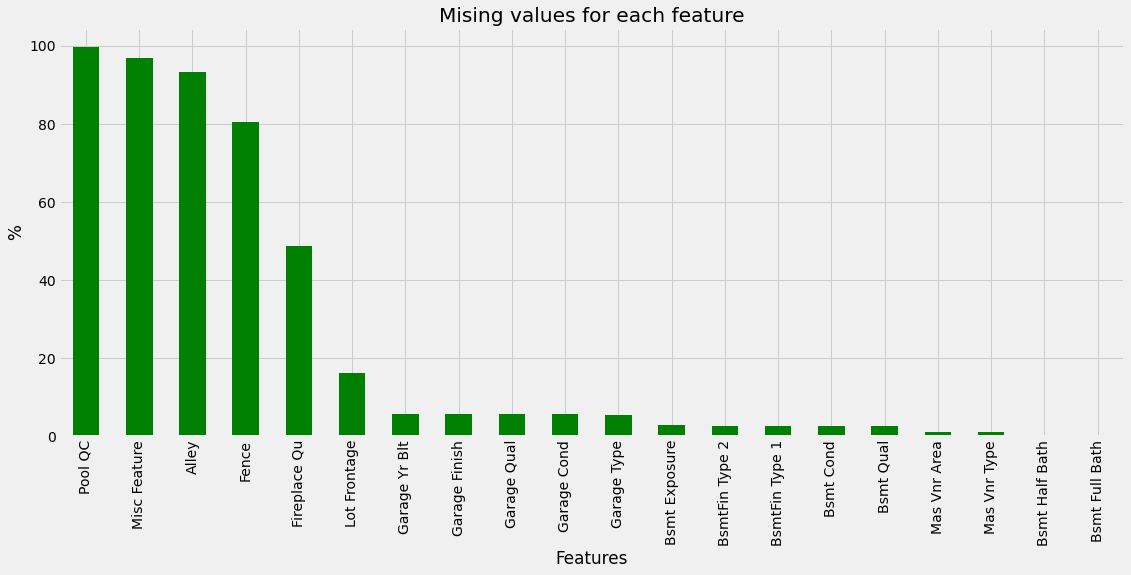

In [387]:
missing_data_pct = pd.Series(dict_missing)
missing_data_pct.plot(kind='bar', figsize=(17,7), color='green', 
                      title='Mising values for each feature', xlabel='Features', ylabel='%');

Top missing values in the data set, **drop the columns with percentages greater than 80%**

These features need to be dropped: *'Pool QC', 'Misc Feature', 'Alley', 'Fence'

In [388]:
train_df = train_df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1)

In [389]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

In [390]:
# Will use Id as reference when merging data frames 
train_df_id = train_df['Id'].copy()
train_df_id

0        109
1        544
2        153
3        318
4        255
        ... 
2046    1587
2047     785
2048     916
2049     639
2050      10
Name: Id, Length: 2051, dtype: int64

In [391]:
# Columns to drop: 'PID', no correlation with price
# Will use Id as reference when merging data frames 

train_df = train_df.drop(['Id','PID'], axis=1) 
train_df.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
0           60        RL           NaN     13517   Pave       IR1   
1           60        RL          43.0     11492   Pave       IR1   
2           20        RL          68.0      7922   Pave       Reg   
3           60        RL          73.0      9802   Pave       Reg   
4           50        RL          82.0     14235   Pave       IR1   

  Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
0          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1          Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3          Lvl    AllPub     Inside        Gtl       Timber        Norm   
4          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   

  Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
0        Norm      1Fam      2Story             6             8        1976   
1        Norm      1Fam      2Story             7             5        1996   
2        Norm      1Fam      1Story             5             7        1953   
3        Norm      1Fam      2Story             5             5        2006   
4        Norm      1Fam      1.5Fin             6             8        1900   

   Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond  \
0         289.0         Gd         TA     CBlock        TA        TA   
1         132.0         Gd         TA      PConc        Gd        TA   
2           0.0         TA         Gd     CBlock        TA        TA   
3           0.0         TA         TA      PConc        Gd        TA   
4           0.0         TA         TA      PConc        Fa        Gd   

  Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  \
0            No            GLQ         533.0            Unf           0.0   
1            No            GLQ         637.0            Unf           0.0   
2            No            GLQ         731.0            Unf           0.0   
3            No            Unf           0.0            Unf           0.0   
4            No            Unf           0.0            Unf           0.0   

   Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air Electrical  \
0        192.0          725.0    GasA         Ex           Y      SBrkr   
1        276.0          913.0    GasA         Ex           Y      SBrkr   
2        326.0         1057.0    GasA         TA           Y      SBrkr   
3        384.0          384.0    GasA         Gd           Y      SBrkr   
4        676.0          676.0    GasA         TA           Y      SBrkr   

   1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
0         725         754                0         1479             0.0   
1         913        1209                0         2122             1.0   
2        1057           0                0         1057             1.0   
3         744         700                0         1444             0.0   
4         831         614                0         1445             0.0   

   Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
0             0.0          2          1              3              1   
1             0.0          2          1              4              1   
2             0.0          1          0              3              1   
3             0.0          2          1              3              1   
4           

### Selecting the numeric variables

In [392]:
# Select the numeric variables with int64, float64

# Overall Qual, Overall Cond are ordinal variables in the train_df_num, will need to drop them and add to the train_df_cat

train_df_num = train_df.select_dtypes(['int64', 'float64']).drop(['Kitchen AbvGr','Overall Qual', 'Overall Cond'], axis=1).copy()
train_df_num.head()

MS SubClass  Lot Frontage  Lot Area  Year Built  Year Remod/Add  \
0           60           NaN     13517        1976            2005   
1           60          43.0     11492        1996            1997   
2           20          68.0      7922        1953            2007   
3           60          73.0      9802        2006            2007   
4           50          82.0     14235        1900            1993   

   Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
0         289.0         533.0           0.0        192.0          725.0   
1         132.0         637.0           0.0        276.0          913.0   
2           0.0         731.0           0.0        326.0         1057.0   
3           0.0           0.0           0.0        384.0          384.0   
4           0.0           0.0           0.0        676.0          676.0   

   1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
0         725         754                0         1479             0.0   
1         913        1209                0         2122             1.0   
2        1057           0                0         1057             1.0   
3         744         700                0         1444             0.0   
4         831         614                0         1445             0.0   

   Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  TotRms AbvGrd  \
0             0.0          2          1              3              6   
1             0.0          2          1              4              8   
2             0.0          1          0              3              5   
3             0.0          2          1              3              7   
4             0.0          2          0              3              6   

   Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  \
0           0         1976.0          2.0        475.0             0   
1           1         1997.0          2.0        559.0             0   
2           0         1953.0          1.0        246.0             0   
3           0         2007.0          2.0        400.0           100   
4           0         1957.0          2.0        484.0             0   

   Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
0             44               0           0             0          0   
1             74               0           0             0          0   
2             52               0           0             0          0   
3              0               0           0             0          0   
4             59               0           0             0          0   

   Misc Val  Mo Sold  Yr Sold  SalePrice  
0         0        3     2010     130500  
1         0        4     2009     220000  
2         0        1     2010     109000  
3         0        4     2010     174000  
4         0        3     2010     138500

In [393]:
# Overall Qual, Overall Cond are ordinal variables

train_df_num_overall_qual_cond = train_df[['Overall Qual', 'Overall Cond']]

### Selecting the categorical variables

In [394]:
# Select the categorical variables
train_df_cat = train_df.select_dtypes(['object']).copy()
train_df_cat.head()

MS Zoning Street Lot Shape Land Contour Utilities Lot Config Land Slope  \
0        RL   Pave       IR1          Lvl    AllPub    CulDSac        Gtl   
1        RL   Pave       IR1          Lvl    AllPub    CulDSac        Gtl   
2        RL   Pave       Reg          Lvl    AllPub     Inside        Gtl   
3        RL   Pave       Reg          Lvl    AllPub     Inside        Gtl   
4        RL   Pave       IR1          Lvl    AllPub     Inside        Gtl   

  Neighborhood Condition 1 Condition 2 Bldg Type House Style Roof Style  \
0       Sawyer        RRAe        Norm      1Fam      2Story      Gable   
1      SawyerW        Norm        Norm      1Fam      2Story      Gable   
2        NAmes        Norm        Norm      1Fam      1Story      Gable   
3       Timber        Norm        Norm      1Fam      2Story      Gable   
4      SawyerW        Norm        Norm      1Fam      1.5Fin      Gable   

  Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type Exter Qual Exter Cond  \
0   CompShg      HdBoard      Plywood      BrkFace         Gd         TA   
1   CompShg      VinylSd      VinylSd      BrkFace         Gd         TA   
2   CompShg      VinylSd      VinylSd         None         TA         Gd   
3   CompShg      VinylSd      VinylSd         None         TA         TA   
4   CompShg      Wd Sdng      Plywood         None         TA         TA   

  Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2  \
0     CBlock        TA        TA            No            GLQ            Unf   
1      PConc        Gd        TA            No            GLQ            Unf   
2     CBlock        TA        TA            No            GLQ            Unf   
3      PConc        Gd        TA            No            Unf            Unf   
4      PConc        Fa        Gd            No            Unf            Unf   

  Heating Heating QC Central Air Electrical Kitchen Qual Functional  \
0    GasA         Ex           Y      SBrkr           Gd        Typ   
1    GasA         Ex           Y      SBrkr           Gd        Typ   
2    GasA         TA           Y      SBrkr           Gd        Typ   
3    GasA         Gd           Y      SBrkr           TA        Typ   
4    GasA         TA           Y      SBrkr           TA        Typ   

  Fireplace Qu Garage Type Garage Finish Garage Qual Garage Cond Paved Drive  \
0          NaN      Attchd           RFn          TA          TA           Y   
1           TA      Attchd           RFn          TA          TA           Y   
2          NaN      Detchd           Unf          TA          TA           Y   
3          NaN     BuiltIn           Fin          TA          TA           Y   
4          NaN      Detchd           Unf          TA          TA           N   

  Sale Type  
0       WD   
1       WD   
2       WD   
3       WD   
4       WD

In [395]:
# Not required as adding them back to the numeric variables
# Concatenating the train_df_num_ord with train_df_cat
# train_df_cat = pd.concat([train_df_cat, train_df_num_ord], axis=1)
# train_df_cat.head()

### Cleaning the train_df_num

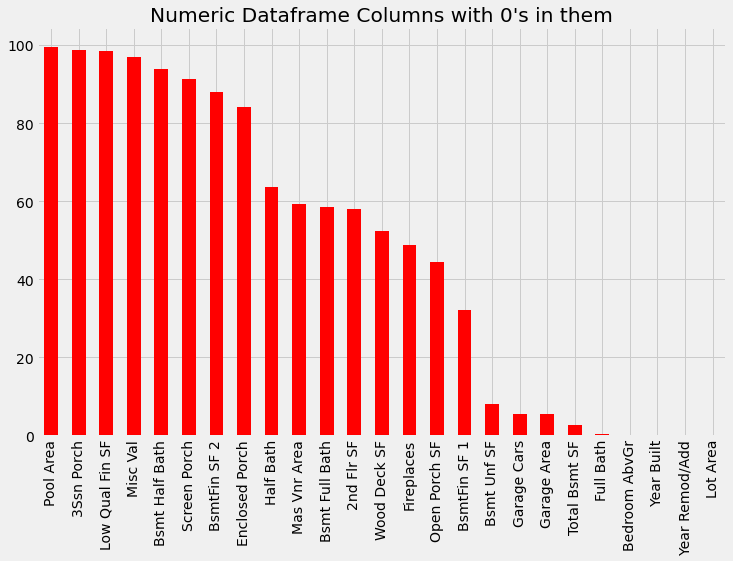

In [396]:
# Count the columns with values with 0's in them
train_df_with_0 = (((train_df_num.isin([0]).sum() / len(train_df_num)) * 100).sort_values(ascending=False)).iloc[:-9]

train_df_with_0.sort_values(ascending=False).plot(kind='bar', 
                                                  figsize=(11,7), title='Numeric Dataframe Columns with 0\'s in them', color='red');

In [397]:
train_df_with_0

Pool Area          99.561190
3Ssn Porch         98.732326
Low Qual Fin SF    98.391029
Misc Val           96.830814
Bsmt Half Bath     93.759142
Screen Porch       91.175037
BsmtFin SF 2       87.908337
Enclosed Porch     84.056558
Half Bath          63.773769
Mas Vnr Area       59.288152
Bsmt Full Bath     58.508045
2nd Flr SF         58.069235
Wood Deck SF       52.413457
Fireplaces         48.756704
Open Porch SF      44.466114
BsmtFin SF 1       32.033155
Bsmt Unf SF         8.044856
Garage Cars         5.509508
Garage Area         5.509508
Total Bsmt SF       2.632862
Full Bath           0.390054
Bedroom AbvGr       0.243784
Year Remod/Add      0.000000
Year Built          0.000000
Lot Area            0.000000
dtype: float64

In [398]:
# Find the correlation for features will 0's in them with SalePrice
train_df_with_0 = pd.concat([train_df[train_df_with_0.index],train_df['SalePrice']],axis=1)
train_df_with_0.head()

Pool Area  3Ssn Porch  Low Qual Fin SF  Misc Val  Bsmt Half Bath  \
0          0           0                0         0             0.0   
1          0           0                0         0             0.0   
2          0           0                0         0             0.0   
3          0           0                0         0             0.0   
4          0           0                0         0             0.0   

   Screen Porch  BsmtFin SF 2  Enclosed Porch  Half Bath  Mas Vnr Area  \
0             0           0.0               0          1         289.0   
1             0           0.0               0          1         132.0   
2             0           0.0               0          0           0.0   
3             0           0.0               0          1           0.0   
4             0           0.0               0          0           0.0   

   Bsmt Full Bath  2nd Flr SF  Wood Deck SF  Fireplaces  Open Porch SF  \
0             0.0         754             0           0             44   
1             1.0        1209             0           1             74   
2             1.0           0             0           0             52   
3             0.0         700           100           0              0   
4             0.0         614             0           0             59   

   BsmtFin SF 1  Bsmt Unf SF  Garage Cars  Garage Area  Total Bsmt SF  \
0         533.0        192.0          2.0        475.0          725.0   
1         637.0        276.0          2.0        559.0          913.0   
2         731.0        326.0          1.0        246.0         1057.0   
3           0.0        384.0          2.0        400.0          384.0   
4           0.0        676.0          2.0        484.0          676.0   

   Full Bath  Bedroom AbvGr  Year Remod/Add  Year Built  Lot Area  SalePrice  
0          2              3            2005        1976     13517     130500  
1          2              4            1997        1996     11492     220000  
2          1              3            2007        1953      7922     109000  
3          2              3            2007        2006      9802     174000  
4          2              3            1993        1900     14235     138500

In [5]:
def corr_heatmap(dataframe, label='test', cmap='coolwarm'):
    mask = np.zeros_like(dataframe.corr())
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize=(25,20))

    sns.heatmap(dataframe.corr(), annot=True, mask=mask, cmap=cmap, annot_kws={'fontsize':14})
    plt.title('Correlation of features of ' + label + ' variables')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

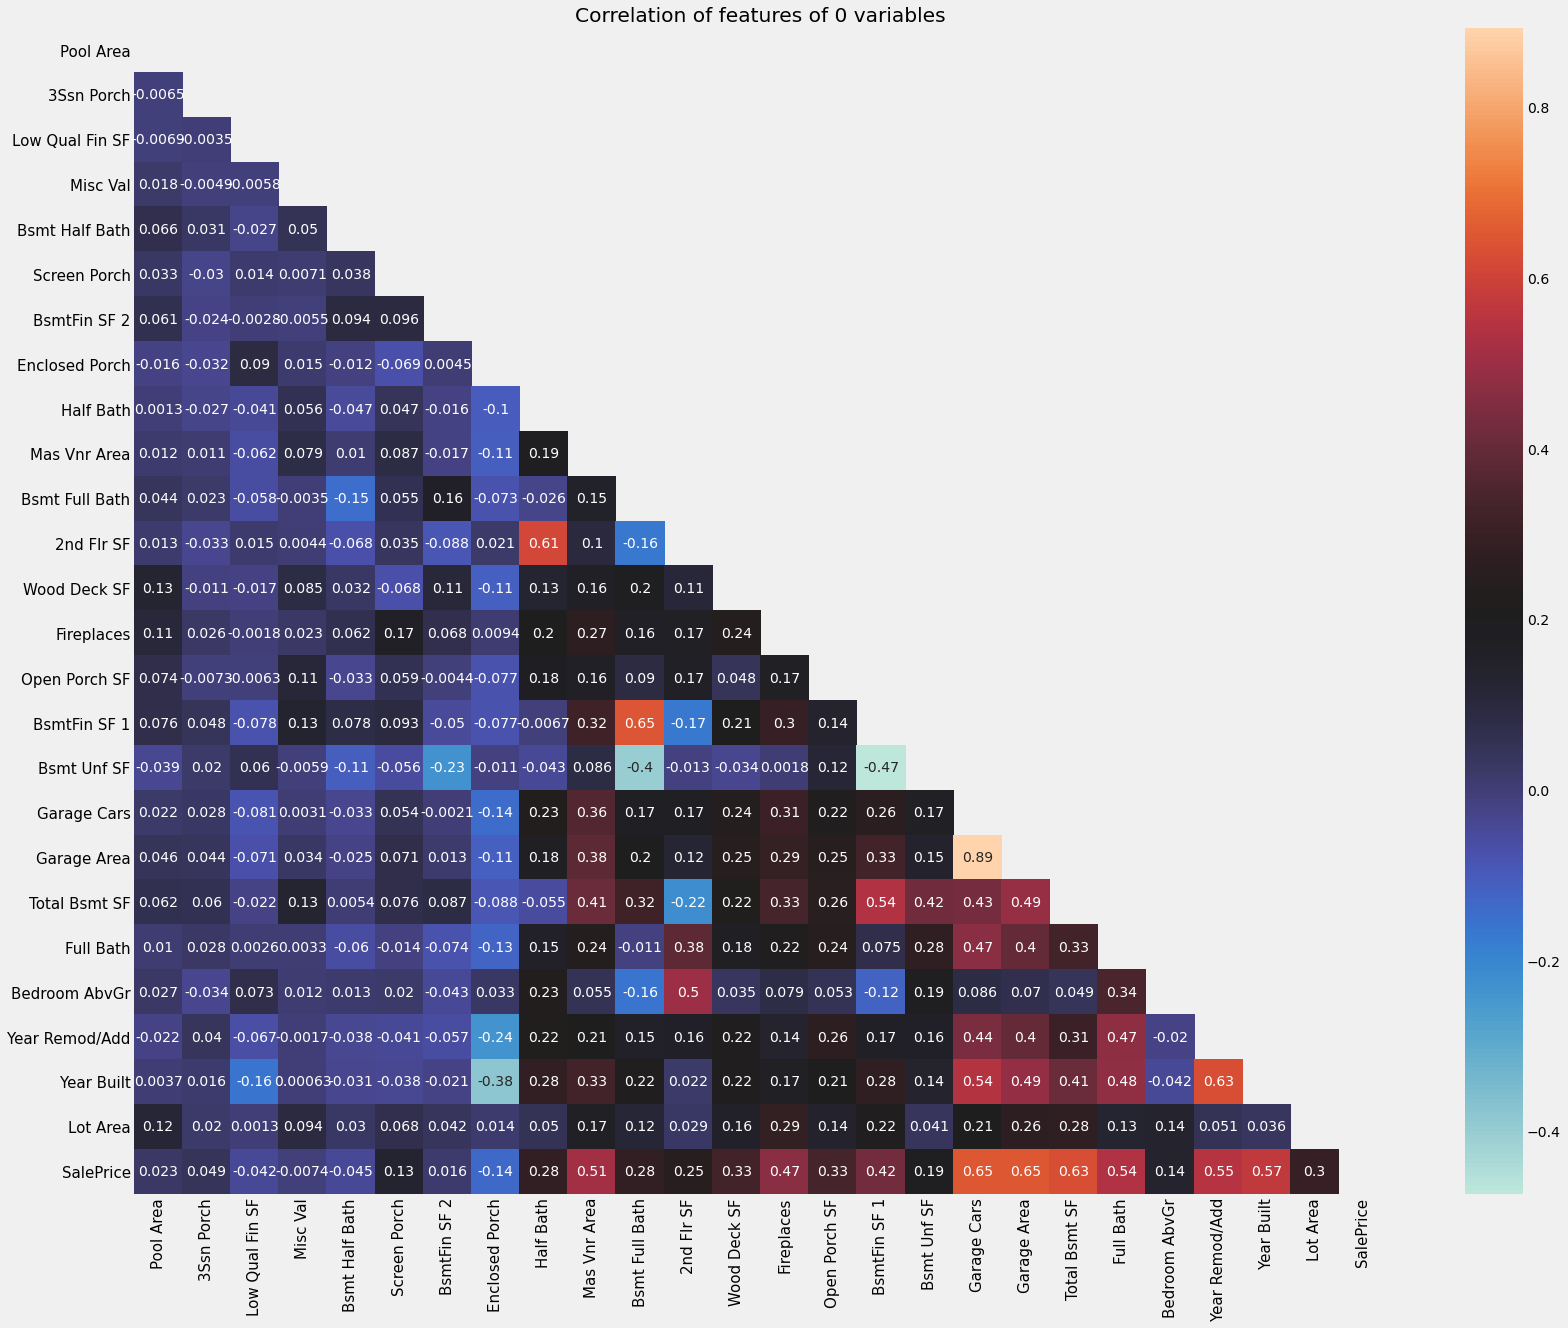

In [400]:
# Heatmap correlation of columns with 0's with SalePrice

corr_heatmap(train_df_with_0, '0', 'icefire')

In [6]:
def single_corr_heatmap(dataframe, feature, colormap='icefire'):
    df_corr = pd.DataFrame(dataframe.corr()[feature]).sort_values(feature, ascending=False)
    plt.figure(figsize=(11,7))
    sns.heatmap(df_corr, cmap=colormap, annot=True)
    if len(feature) > 1:
        plt.title('Correlation of numeric features with ' + ", ".join(feature), fontsize=15, pad=15)
    else:
        plt.title('Correlation of numeric features with ' + "".join(feature), fontsize=15, pad=15)
    plt.xlabel('')
    plt.ylabel('')

# single_corr_heatmap(train_df_with_0, ['SalePrice'])

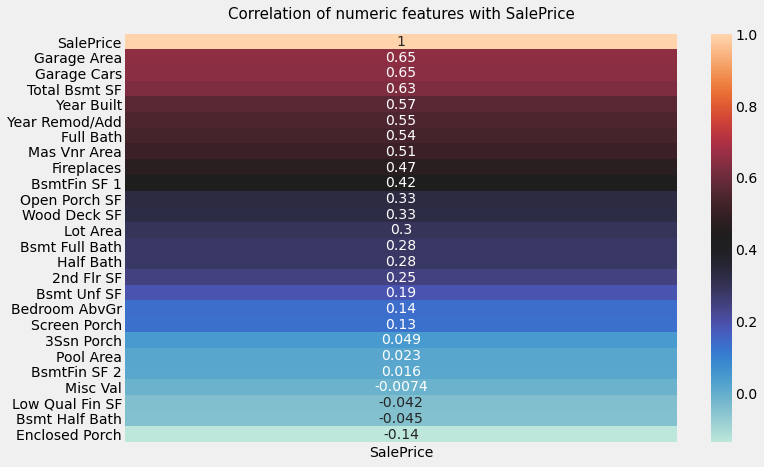

In [402]:
single_corr_heatmap(train_df_with_0, ['SalePrice'])

In [403]:
train_df_with_0.columns

Index(['Pool Area', '3Ssn Porch', 'Low Qual Fin SF', 'Misc Val',
       'Bsmt Half Bath', 'Screen Porch', 'BsmtFin SF 2', 'Enclosed Porch',
       'Half Bath', 'Mas Vnr Area', 'Bsmt Full Bath', '2nd Flr SF',
       'Wood Deck SF', 'Fireplaces', 'Open Porch SF', 'BsmtFin SF 1',
       'Bsmt Unf SF', 'Garage Cars', 'Garage Area', 'Total Bsmt SF',
       'Full Bath', 'Bedroom AbvGr', 'Year Remod/Add', 'Year Built',
       'Lot Area', 'SalePrice'],
      dtype='object')

Based on the correlation heatmap, the following numeric columns with a lot of 0's in them have **very little correlation with price**:
* Pool Area (99.5%, 0.023) (Almost all houses do not have pools, will **drop pool related features**)
* 3Ssn Porch (98.7%, 0.049)
* Low Qual Fin SF (98.39%, -0.042)
* Misc Val (96.83%, -0.0074) (Almost all houses do not have Miscellaneous features)
* Bsmt Half Bath (93.7%, -0.045) 
* Screen Porch (91.17%, 0.13)
* BsmtFin SF 2 (87.9%, 0.016)
* Enclosed Porch (84.05%, -0.14)
* Bsmt Unf SF (8.04%, 0.19)

**These features will be dropped in train_df_num**

In [404]:
# Drop the numeric columns with the most 0's and with the least correlation against price
train_df_num = train_df_num.drop(['Pool Area', '3Ssn Porch', 'Low Qual Fin SF', 'Misc Val',
       'Bsmt Half Bath', 'Screen Porch', 'BsmtFin SF 2', 'Enclosed Porch',
       'Bsmt Unf SF'], axis=1)
train_df_num.head()

MS SubClass  Lot Frontage  Lot Area  Year Built  Year Remod/Add  \
0           60           NaN     13517        1976            2005   
1           60          43.0     11492        1996            1997   
2           20          68.0      7922        1953            2007   
3           60          73.0      9802        2006            2007   
4           50          82.0     14235        1900            1993   

   Mas Vnr Area  BsmtFin SF 1  Total Bsmt SF  1st Flr SF  2nd Flr SF  \
0         289.0         533.0          725.0         725         754   
1         132.0         637.0          913.0         913        1209   
2           0.0         731.0         1057.0        1057           0   
3           0.0           0.0          384.0         744         700   
4           0.0           0.0          676.0         831         614   

   Gr Liv Area  Bsmt Full Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0         1479             0.0          2          1              3   
1         2122             1.0          2          1              4   
2         1057             1.0          1          0              3   
3         1444             0.0          2          1              3   
4         1445             0.0          2          0              3   

   TotRms AbvGrd  Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  \
0              6           0         1976.0          2.0        475.0   
1              8           1         1997.0          2.0        559.0   
2              5           0         1953.0          1.0        246.0   
3              7           0         2007.0          2.0        400.0   
4              6           0         1957.0          2.0        484.0   

   Wood Deck SF  Open Porch SF  Mo Sold  Yr Sold  SalePrice  
0             0             44        3     2010     130500  
1             0             74        4     2009     220000  
2             0             52        1     2010     109000  
3           100              0        4     2010     174000  
4             0             59        3     2010     138500

In [405]:
train_df_num.head()

MS SubClass  Lot Frontage  Lot Area  Year Built  Year Remod/Add  \
0           60           NaN     13517        1976            2005   
1           60          43.0     11492        1996            1997   
2           20          68.0      7922        1953            2007   
3           60          73.0      9802        2006            2007   
4           50          82.0     14235        1900            1993   

   Mas Vnr Area  BsmtFin SF 1  Total Bsmt SF  1st Flr SF  2nd Flr SF  \
0         289.0         533.0          725.0         725         754   
1         132.0         637.0          913.0         913        1209   
2           0.0         731.0         1057.0        1057           0   
3           0.0           0.0          384.0         744         700   
4           0.0           0.0          676.0         831         614   

   Gr Liv Area  Bsmt Full Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0         1479             0.0          2          1              3   
1         2122             1.0          2          1              4   
2         1057             1.0          1          0              3   
3         1444             0.0          2          1              3   
4         1445             0.0          2          0              3   

   TotRms AbvGrd  Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  \
0              6           0         1976.0          2.0        475.0   
1              8           1         1997.0          2.0        559.0   
2              5           0         1953.0          1.0        246.0   
3              7           0         2007.0          2.0        400.0   
4              6           0         1957.0          2.0        484.0   

   Wood Deck SF  Open Porch SF  Mo Sold  Yr Sold  SalePrice  
0             0             44        3     2010     130500  
1             0             74        4     2009     220000  
2             0             52        1     2010     109000  
3           100              0        4     2010     174000  
4             0             59        3     2010     138500

In [406]:
# Plot the heatmap of the numeric variables
# plt.figure(figsize=(11,7))
# sns.heatmap(data=train_df_num.corr()['SalePrice'],annot=True, cmap='viridis')

train_df_num.corr()['SalePrice'].sort_values(ascending=False)

SalePrice         1.000000
Gr Liv Area       0.697038
Garage Area       0.650270
Garage Cars       0.648220
Total Bsmt SF     0.628925
1st Flr SF        0.618486
Year Built        0.571849
Year Remod/Add    0.550370
Full Bath         0.537969
Garage Yr Blt     0.533922
Mas Vnr Area      0.512230
TotRms AbvGrd     0.504014
Fireplaces        0.471093
BsmtFin SF 1      0.423519
Lot Frontage      0.341842
Open Porch SF     0.333476
Wood Deck SF      0.326490
Lot Area          0.296566
Bsmt Full Bath    0.283662
Half Bath         0.283001
2nd Flr SF        0.248452
Bedroom AbvGr     0.137067
Mo Sold           0.032735
Yr Sold          -0.015203
MS SubClass      -0.087335
Name: SalePrice, dtype: float64

In [407]:
train_df_num.drop('SalePrice', axis=1, inplace=True)

In [408]:
# Missing values in train_df_num
train_df_num.isnull().sum().sort_values(ascending=False) / len(train_df_num.isnull().sum().sort_values(ascending=False))

Lot Frontage      13.750000
Garage Yr Blt      4.750000
Mas Vnr Area       0.916667
Bsmt Full Bath     0.083333
Garage Area        0.041667
Garage Cars        0.041667
BsmtFin SF 1       0.041667
Total Bsmt SF      0.041667
2nd Flr SF         0.000000
Lot Area           0.000000
Year Built         0.000000
Year Remod/Add     0.000000
1st Flr SF         0.000000
Yr Sold            0.000000
Gr Liv Area        0.000000
Mo Sold            0.000000
Full Bath          0.000000
Half Bath          0.000000
Bedroom AbvGr      0.000000
TotRms AbvGrd      0.000000
Fireplaces         0.000000
Wood Deck SF       0.000000
Open Porch SF      0.000000
MS SubClass        0.000000
dtype: float64

In [409]:
train_df_num.head()

MS SubClass  Lot Frontage  Lot Area  Year Built  Year Remod/Add  \
0           60           NaN     13517        1976            2005   
1           60          43.0     11492        1996            1997   
2           20          68.0      7922        1953            2007   
3           60          73.0      9802        2006            2007   
4           50          82.0     14235        1900            1993   

   Mas Vnr Area  BsmtFin SF 1  Total Bsmt SF  1st Flr SF  2nd Flr SF  \
0         289.0         533.0          725.0         725         754   
1         132.0         637.0          913.0         913        1209   
2           0.0         731.0         1057.0        1057           0   
3           0.0           0.0          384.0         744         700   
4           0.0           0.0          676.0         831         614   

   Gr Liv Area  Bsmt Full Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0         1479             0.0          2          1              3   
1         2122             1.0          2          1              4   
2         1057             1.0          1          0              3   
3         1444             0.0          2          1              3   
4         1445             0.0          2          0              3   

   TotRms AbvGrd  Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  \
0              6           0         1976.0          2.0        475.0   
1              8           1         1997.0          2.0        559.0   
2              5           0         1953.0          1.0        246.0   
3              7           0         2007.0          2.0        400.0   
4              6           0         1957.0          2.0        484.0   

   Wood Deck SF  Open Porch SF  Mo Sold  Yr Sold  
0             0             44        3     2010  
1             0             74        4     2009  
2             0             52        1     2010  
3           100              0        4     2010  
4             0             59        3     2010

In [410]:
# Mode of train_df_num for the missing discrete values in the columns
mode_values = train_df_num[['Garage Yr Blt', 'Garage Cars', 'Bsmt Full Bath']].mode().astype('int64')
mode_values

Garage Yr Blt  Garage Cars  Bsmt Full Bath
0           2005            2               0

In [411]:
# Mean of train_df_num for the missing continuous values in the columns
mean_values = dict(round(train_df_num[['Lot Frontage','Mas Vnr Area', 'Garage Area', 'BsmtFin SF 1','Total Bsmt SF']].mean(),2))
mean_values

{'Lot Frontage': 69.06,
 'Mas Vnr Area': 99.7,
 'Garage Area': 473.67,
 'BsmtFin SF 1': 442.3,
 'Total Bsmt SF': 1057.99}

In [412]:
def agg_dict(dataframe):
    '''
    Creates a dictionary of the aggregated dataframe function
    '''
    new_dict = {}
    for index, key in enumerate(mode_values.keys()):
        new_dict[key] = mode_values.values.tolist().pop()[index]
    return new_dict

agg_dict(mode_values)

{'Garage Yr Blt': 2005, 'Garage Cars': 2, 'Bsmt Full Bath': 0}

In [413]:
train_df_num = train_df_num.fillna(agg_dict(mode_values)) # Fill the nulls values of the train_df_num with the mode values
train_df_num = train_df_num.fillna(mean_values) # Fill the nulls values of the train_df_num with the mean values
train_df_num.isnull().sum().sort_values(ascending=False)

Yr Sold           0
Mo Sold           0
Lot Frontage      0
Lot Area          0
Year Built        0
Year Remod/Add    0
Mas Vnr Area      0
BsmtFin SF 1      0
Total Bsmt SF     0
1st Flr SF        0
2nd Flr SF        0
Gr Liv Area       0
Bsmt Full Bath    0
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
TotRms AbvGrd     0
Fireplaces        0
Garage Yr Blt     0
Garage Cars       0
Garage Area       0
Wood Deck SF      0
Open Porch SF     0
MS SubClass       0
dtype: int64

In [414]:
train_df_num.head()

MS SubClass  Lot Frontage  Lot Area  Year Built  Year Remod/Add  \
0           60         69.06     13517        1976            2005   
1           60         43.00     11492        1996            1997   
2           20         68.00      7922        1953            2007   
3           60         73.00      9802        2006            2007   
4           50         82.00     14235        1900            1993   

   Mas Vnr Area  BsmtFin SF 1  Total Bsmt SF  1st Flr SF  2nd Flr SF  \
0         289.0         533.0          725.0         725         754   
1         132.0         637.0          913.0         913        1209   
2           0.0         731.0         1057.0        1057           0   
3           0.0           0.0          384.0         744         700   
4           0.0           0.0          676.0         831         614   

   Gr Liv Area  Bsmt Full Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0         1479             0.0          2          1              3   
1         2122             1.0          2          1              4   
2         1057             1.0          1          0              3   
3         1444             0.0          2          1              3   
4         1445             0.0          2          0              3   

   TotRms AbvGrd  Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  \
0              6           0         1976.0          2.0        475.0   
1              8           1         1997.0          2.0        559.0   
2              5           0         1953.0          1.0        246.0   
3              7           0         2007.0          2.0        400.0   
4              6           0         1957.0          2.0        484.0   

   Wood Deck SF  Open Porch SF  Mo Sold  Yr Sold  
0             0             44        3     2010  
1             0             74        4     2009  
2             0             52        1     2010  
3           100              0        4     2010  
4             0             59        3     2010

In [415]:
# Converting 'Lot Area', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF' to float64 as they're continous values
train_df_num[['Lot Area', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF']] = train_df_num[['Lot Area', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF']].astype('float64')
train_df_num.head()

MS SubClass  Lot Frontage  Lot Area  Year Built  Year Remod/Add  \
0           60         69.06   13517.0        1976            2005   
1           60         43.00   11492.0        1996            1997   
2           20         68.00    7922.0        1953            2007   
3           60         73.00    9802.0        2006            2007   
4           50         82.00   14235.0        1900            1993   

   Mas Vnr Area  BsmtFin SF 1  Total Bsmt SF  1st Flr SF  2nd Flr SF  \
0         289.0         533.0          725.0       725.0       754.0   
1         132.0         637.0          913.0       913.0      1209.0   
2           0.0         731.0         1057.0      1057.0         0.0   
3           0.0           0.0          384.0       744.0       700.0   
4           0.0           0.0          676.0       831.0       614.0   

   Gr Liv Area  Bsmt Full Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0       1479.0             0.0          2          1              3   
1       2122.0             1.0          2          1              4   
2       1057.0             1.0          1          0              3   
3       1444.0             0.0          2          1              3   
4       1445.0             0.0          2          0              3   

   TotRms AbvGrd  Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  \
0              6           0         1976.0          2.0        475.0   
1              8           1         1997.0          2.0        559.0   
2              5           0         1953.0          1.0        246.0   
3              7           0         2007.0          2.0        400.0   
4              6           0         1957.0          2.0        484.0   

   Wood Deck SF  Open Porch SF  Mo Sold  Yr Sold  
0           0.0           44.0        3     2010  
1           0.0           74.0        4     2009  
2           0.0           52.0        1     2010  
3         100.0            0.0        4     2010  
4           0.0           59.0        3     2010

In [416]:
# Converting Bsmt Full Bath, Garage Cars, Garage Yr Blt, Garage Cars to int64 as they're discrete values
train_df_num[['Bsmt Full Bath','Garage Cars','Garage Yr Blt']] = train_df_num[['Bsmt Full Bath','Garage Cars','Garage Yr Blt']] .astype('int64')
train_df_num.head()

MS SubClass  Lot Frontage  Lot Area  Year Built  Year Remod/Add  \
0           60         69.06   13517.0        1976            2005   
1           60         43.00   11492.0        1996            1997   
2           20         68.00    7922.0        1953            2007   
3           60         73.00    9802.0        2006            2007   
4           50         82.00   14235.0        1900            1993   

   Mas Vnr Area  BsmtFin SF 1  Total Bsmt SF  1st Flr SF  2nd Flr SF  \
0         289.0         533.0          725.0       725.0       754.0   
1         132.0         637.0          913.0       913.0      1209.0   
2           0.0         731.0         1057.0      1057.0         0.0   
3           0.0           0.0          384.0       744.0       700.0   
4           0.0           0.0          676.0       831.0       614.0   

   Gr Liv Area  Bsmt Full Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0       1479.0               0          2          1              3   
1       2122.0               1          2          1              4   
2       1057.0               1          1          0              3   
3       1444.0               0          2          1              3   
4       1445.0               0          2          0              3   

   TotRms AbvGrd  Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  \
0              6           0           1976            2        475.0   
1              8           1           1997            2        559.0   
2              5           0           1953            1        246.0   
3              7           0           2007            2        400.0   
4              6           0           1957            2        484.0   

   Wood Deck SF  Open Porch SF  Mo Sold  Yr Sold  
0           0.0           44.0        3     2010  
1           0.0           74.0        4     2009  
2           0.0           52.0        1     2010  
3         100.0            0.0        4     2010  
4           0.0           59.0        3     2010

In [417]:
# 'MS SubClass' is a nominal variable
train_df_num.drop('MS SubClass', axis=1, inplace=True)

### Cleaning the train_df_cat

In [418]:
train_df_cat.head()

MS Zoning Street Lot Shape Land Contour Utilities Lot Config Land Slope  \
0        RL   Pave       IR1          Lvl    AllPub    CulDSac        Gtl   
1        RL   Pave       IR1          Lvl    AllPub    CulDSac        Gtl   
2        RL   Pave       Reg          Lvl    AllPub     Inside        Gtl   
3        RL   Pave       Reg          Lvl    AllPub     Inside        Gtl   
4        RL   Pave       IR1          Lvl    AllPub     Inside        Gtl   

  Neighborhood Condition 1 Condition 2 Bldg Type House Style Roof Style  \
0       Sawyer        RRAe        Norm      1Fam      2Story      Gable   
1      SawyerW        Norm        Norm      1Fam      2Story      Gable   
2        NAmes        Norm        Norm      1Fam      1Story      Gable   
3       Timber        Norm        Norm      1Fam      2Story      Gable   
4      SawyerW        Norm        Norm      1Fam      1.5Fin      Gable   

  Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type Exter Qual Exter Cond  \
0   CompShg      HdBoard      Plywood      BrkFace         Gd         TA   
1   CompShg      VinylSd      VinylSd      BrkFace         Gd         TA   
2   CompShg      VinylSd      VinylSd         None         TA         Gd   
3   CompShg      VinylSd      VinylSd         None         TA         TA   
4   CompShg      Wd Sdng      Plywood         None         TA         TA   

  Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2  \
0     CBlock        TA        TA            No            GLQ            Unf   
1      PConc        Gd        TA            No            GLQ            Unf   
2     CBlock        TA        TA            No            GLQ            Unf   
3      PConc        Gd        TA            No            Unf            Unf   
4      PConc        Fa        Gd            No            Unf            Unf   

  Heating Heating QC Central Air Electrical Kitchen Qual Functional  \
0    GasA         Ex           Y      SBrkr           Gd        Typ   
1    GasA         Ex           Y      SBrkr           Gd        Typ   
2    GasA         TA           Y      SBrkr           Gd        Typ   
3    GasA         Gd           Y      SBrkr           TA        Typ   
4    GasA         TA           Y      SBrkr           TA        Typ   

  Fireplace Qu Garage Type Garage Finish Garage Qual Garage Cond Paved Drive  \
0          NaN      Attchd           RFn          TA          TA           Y   
1           TA      Attchd           RFn          TA          TA           Y   
2          NaN      Detchd           Unf          TA          TA           Y   
3          NaN     BuiltIn           Fin          TA          TA           Y   
4          NaN      Detchd           Unf          TA          TA           N   

  Sale Type  
0       WD   
1       WD   
2       WD   
3       WD   
4       WD

In [419]:
train_df_cat.columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Sale Type'],
      dtype='object')

For train_df_cat,

**Nominal variables:**
* MS SubClass (Type of subclass)
* Ms Zoning
* Street (Gravel or Pavel) (Change to 0,1)
* Land Contour
* Lot Config
* Neighbourhood
* Condition 1 and Condition 2 (Proxmity to various locations)
* Bldg Type (Type of dwelling)
* House style (Type of dwelling)
* Roof Style
* Roof Matl
* Exterior 1st and Exterior 2nd
* Mas Vnr Type
* Foundation 
* Heating
* Central Air (Change to 0,1)
* Garage Type
* Sale Type


**Ordinal variables:**
* Lot Shape (Regular, slightly irregular ..)
* Utilities
* Land Slope (Gentle, moderate .. slope)
* Exter Qual (quality of the material on the exterior)
* Exter Cond (present condition of the material on the exterior)
* Bsmt Qual (height of the basement)
* Bsmt Exposure
* BsmtFin Type 1
* BsmtFin Type 2
* HeatingQC
* Electrical
 * SBrkr	Standard Circuit Breakers & Romex,  (5)
 * FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	 (4)
 * FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair) (3)
 * FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor) (2)
 * Mix	Mixed (1)
* KitchenQual
* Kitchen AbvGr
* Functional (Home functionality)
* Garage Cond
* Paved Drive

In [420]:
# Adding back MS SubClass, Kitchen AbvGr to train_df_Cat
train_df_cat.insert(0, 'MS SubClass', train_df['MS SubClass'])
train_df_cat.insert(30, 'Kitchen AbvGr', train_df['Kitchen AbvGr'])

In [421]:
train_df_cat

MS SubClass MS Zoning Street Lot Shape Land Contour Utilities  \
0              60        RL   Pave       IR1          Lvl    AllPub   
1              60        RL   Pave       IR1          Lvl    AllPub   
2              20        RL   Pave       Reg          Lvl    AllPub   
3              60        RL   Pave       Reg          Lvl    AllPub   
4              50        RL   Pave       IR1          Lvl    AllPub   
...           ...       ...    ...       ...          ...       ...   
2046           20        RL   Pave       IR1          HLS    AllPub   
2047           30        RL   Pave       IR1          Lvl    AllPub   
2048           50        RL   Pave       Reg          Bnk    AllPub   
2049           20        RL   Pave       Reg          Lvl    AllPub   
2050           60        RL   Pave       Reg          Lvl    AllPub   

     Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type  \
0       CulDSac        Gtl       Sawyer        RRAe        Norm      1Fam   
1       CulDSac        Gtl      SawyerW        Norm        Norm      1Fam   
2        Inside        Gtl        NAmes        Norm        Norm      1Fam   
3        Inside        Gtl       Timber        Norm        Norm      1Fam   
4        Inside        Gtl      SawyerW        Norm        Norm      1Fam   
...         ...        ...          ...         ...         ...       ...   
2046     Inside        Gtl       Timber        Norm        Norm      1Fam   
2047     Inside        Gtl      Edwards        Norm        Norm      1Fam   
2048     Inside        Gtl      Crawfor        Norm        Norm      1Fam   
2049     Corner        Gtl        NAmes        Norm        Norm      1Fam   
2050     Inside        Gtl      Gilbert        Norm        Norm      1Fam   

     House Style Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  \
0         2Story      Gable   CompShg      HdBoard      Plywood      BrkFace   
1         2Story      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2         1Story      Gable   CompShg      VinylSd      VinylSd         None   
3         2Story      Gable   CompShg      VinylSd      VinylSd         None   
4         1.5Fin      Gable   CompShg      Wd Sdng      Plywood         None   
...          ...        ...       ...          ...          ...          ...   
2046      1Story      Gable   CompShg      VinylSd      VinylSd         None   
2047      1Story      Gable   CompShg      VinylSd      VinylSd         None   
2048      1.5Fin      Gable   CompShg      BrkFace        Stone         None   
2049      1Story      Gable   CompShg      Plywood      Plywood         None   
2050      2Story      Gable   CompShg      VinylSd      VinylSd         None   

     Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure  \
0            Gd         TA     CBlock        TA        TA            No   
1            Gd         TA      PConc        Gd        TA            No   
2            TA         Gd     CBlock        TA        TA            No   
3            TA         TA      PConc        Gd        TA            No   
4            TA         TA      PConc        Fa        Gd            No   
...         ...        ...        ...       ...       ...           ...   
2046         Gd         TA      PConc        Gd        TA            Av   
2047         TA         TA     CBlock        TA        TA            No   
2048         TA         TA     BrkTil        TA        TA            No   
2049         TA         TA     CBlock        TA        TA            No   
2050         TA         TA      PConc        TA        TA            No   

     BsmtFin Type 1 BsmtFin Type 2 Heating Heating QC Central Air Electrical  \
0               GLQ            Unf    GasA         Ex           Y      SBrkr   
1               GLQ            Unf    GasA         Ex           Y      SBrkr   
2               GLQ            Unf    GasA         TA           Y      SBrkr   
3               Unf            Unf    GasA    

In [422]:
train_df_cat_null_pct = ((train_df_cat.isnull().sum() / len(train_df_cat)).sort_values(ascending=False) * 100).head(11)
train_df_cat_null_pct

Fireplace Qu      48.756704
Garage Cond        5.558264
Garage Qual        5.558264
Garage Finish      5.558264
Garage Type        5.509508
Bsmt Exposure      2.827889
BsmtFin Type 2     2.730375
Bsmt Qual          2.681619
Bsmt Cond          2.681619
BsmtFin Type 1     2.681619
Mas Vnr Type       1.072647
dtype: float64

In [423]:
cat_null = train_df_cat_null_pct.index.tolist()
cat_null

['Fireplace Qu',
 'Garage Cond',
 'Garage Qual',
 'Garage Finish',
 'Garage Type',
 'Bsmt Exposure',
 'BsmtFin Type 2',
 'Bsmt Qual',
 'Bsmt Cond',
 'BsmtFin Type 1',
 'Mas Vnr Type']

<AxesSubplot:title={'center':'Null values for each variable as a percentage'}, xlabel='Variables', ylabel='% format'>

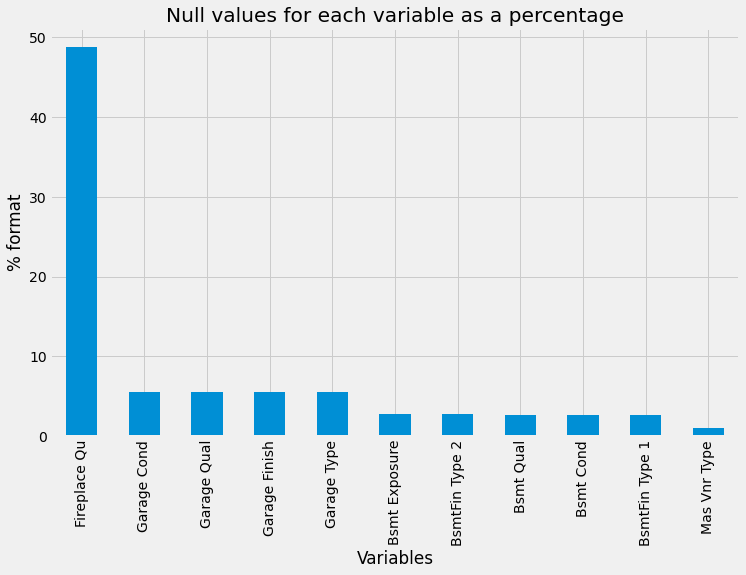

In [424]:
train_df_cat_null_pct.plot(kind='bar', figsize=(11,7),
                           title='Null values for each variable as a percentage',xlabel='Variables', ylabel='% format')

In [425]:
# Mode of the columns with null values
mode_values = train_df_cat[cat_null].mode()
mode_values

Fireplace Qu Garage Cond Garage Qual Garage Finish Garage Type  \
0           Gd          TA          TA           Unf      Attchd   

  Bsmt Exposure BsmtFin Type 2 Bsmt Qual Bsmt Cond BsmtFin Type 1 Mas Vnr Type  
0            No            Unf        TA        TA            GLQ         None

In [426]:
# Fill the null values with the mode of each column
train_df_cat = train_df_cat.fillna(agg_dict(mode_values))
train_df_cat.isnull().sum().sort_values(ascending=False)

Sale Type         0
Paved Drive       0
Mas Vnr Type      0
Exterior 2nd      0
Exterior 1st      0
Roof Matl         0
Roof Style        0
House Style       0
Bldg Type         0
Condition 2       0
Condition 1       0
Neighborhood      0
Land Slope        0
Lot Config        0
Utilities         0
Land Contour      0
Lot Shape         0
Street            0
MS Zoning         0
Exter Qual        0
Exter Cond        0
Foundation        0
Kitchen AbvGr     0
Garage Cond       0
Garage Qual       0
Garage Finish     0
Garage Type       0
Fireplace Qu      0
Functional        0
Kitchen Qual      0
Electrical        0
Bsmt Qual         0
Central Air       0
Heating QC        0
Heating           0
BsmtFin Type 2    0
BsmtFin Type 1    0
Bsmt Exposure     0
Bsmt Cond         0
MS SubClass       0
dtype: int64

In [427]:
# Need to map the values MS SubClass to their categories
train_df_cat['MS SubClass'] = train_df_cat['MS SubClass'].map({
    20:'1-STORY 1946 & NEWER ALL STYLES',
    30:'1-STORY 1945 & OLDER',
    40:'1-STORY W/FINISHED ATTIC ALL AGES',
    45:'-1/2 STORY - UNFINISHED ALL AGES',
    50:'1-1/2 STORY FINISHED ALL AGES',
    60: '2-STORY 1946 & NEWER',
    70: '2-STORY 1945 & OLDER',
    75: '2-1/2 STORY ALL AGES',
    80: 'SPLIT OR MULTI-LEVEL',
    85: 'SPLIT FOYER',
    90: 'DUPLEX - ALL STYLES AND AGES',
    120 : '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
    150: '1-1/2 STORY PUD - ALL AGES',
    160: '2-STORY PUD - 1946 & NEWER',
    180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
    190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'
})

In [428]:
train_df_cat['MS SubClass']

0                  2-STORY 1946 & NEWER
1                  2-STORY 1946 & NEWER
2       1-STORY 1946 & NEWER ALL STYLES
3                  2-STORY 1946 & NEWER
4         1-1/2 STORY FINISHED ALL AGES
                     ...               
2046    1-STORY 1946 & NEWER ALL STYLES
2047               1-STORY 1945 & OLDER
2048      1-1/2 STORY FINISHED ALL AGES
2049    1-STORY 1946 & NEWER ALL STYLES
2050               2-STORY 1946 & NEWER
Name: MS SubClass, Length: 2051, dtype: object

In [429]:
# Converting the values to lower case and added underscores to replace the space later for one hot encoding
train_df_cat['MS SubClass'] = train_df_cat['MS SubClass'].map(lambda x:x.lower().replace(' ', '_').replace('-',''))

In [430]:
train_df_cat['MS SubClass']

0                  2story_1946_&_newer
1                  2story_1946_&_newer
2       1story_1946_&_newer_all_styles
3                  2story_1946_&_newer
4         11/2_story_finished_all_ages
                     ...              
2046    1story_1946_&_newer_all_styles
2047               1story_1945_&_older
2048      11/2_story_finished_all_ages
2049    1story_1946_&_newer_all_styles
2050               2story_1946_&_newer
Name: MS SubClass, Length: 2051, dtype: object

### Need to split between Nominal and Ordinal variables into their dataframes

The Nominal variables will have one hot encoding while the Ordinal variables will have ordinal encoding

In [431]:
# Nominal variables
train_df_nom= train_df_cat[[
    'MS SubClass',
    'MS Zoning',
    'Street', 
    'Land Contour',
    'Lot Config',
    'Neighborhood',
    'Condition 1',
    'Condition 2', 
    'Bldg Type', 
    'House Style', 
    'Roof Style',
    'Roof Matl',
    'Exterior 1st',
    'Exterior 2nd',
    'Mas Vnr Type',
    'Foundation',
    'Heating',
    'Central Air',
    'Garage Type',
    'Sale Type',
]].copy()

train_df_nom.head()

MS SubClass MS Zoning Street Land Contour Lot Config  \
0             2story_1946_&_newer        RL   Pave          Lvl    CulDSac   
1             2story_1946_&_newer        RL   Pave          Lvl    CulDSac   
2  1story_1946_&_newer_all_styles        RL   Pave          Lvl     Inside   
3             2story_1946_&_newer        RL   Pave          Lvl     Inside   
4    11/2_story_finished_all_ages        RL   Pave          Lvl     Inside   

  Neighborhood Condition 1 Condition 2 Bldg Type House Style Roof Style  \
0       Sawyer        RRAe        Norm      1Fam      2Story      Gable   
1      SawyerW        Norm        Norm      1Fam      2Story      Gable   
2        NAmes        Norm        Norm      1Fam      1Story      Gable   
3       Timber        Norm        Norm      1Fam      2Story      Gable   
4      SawyerW        Norm        Norm      1Fam      1.5Fin      Gable   

  Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type Foundation Heating  \
0   CompShg      HdBoard      Plywood      BrkFace     CBlock    GasA   
1   CompShg      VinylSd      VinylSd      BrkFace      PConc    GasA   
2   CompShg      VinylSd      VinylSd         None     CBlock    GasA   
3   CompShg      VinylSd      VinylSd         None      PConc    GasA   
4   CompShg      Wd Sdng      Plywood         None      PConc    GasA   

  Central Air Garage Type Sale Type  
0           Y      Attchd       WD   
1           Y      Attchd       WD   
2           Y      Detchd       WD   
3           Y     BuiltIn       WD   
4           Y      Detchd       WD

In [432]:
# Oridinal variables 
train_df_ord = train_df_cat[[col for col in train_df_cat.columns if col not in train_df_cat_nom.columns]].copy()
train_df_ord.head()

Lot Shape Utilities Land Slope Exter Qual Exter Cond Bsmt Qual Bsmt Cond  \
0       IR1    AllPub        Gtl         Gd         TA        TA        TA   
1       IR1    AllPub        Gtl         Gd         TA        Gd        TA   
2       Reg    AllPub        Gtl         TA         Gd        TA        TA   
3       Reg    AllPub        Gtl         TA         TA        Gd        TA   
4       IR1    AllPub        Gtl         TA         TA        Fa        Gd   

  Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2 Heating QC Electrical  \
0            No            GLQ            Unf         Ex      SBrkr   
1            No            GLQ            Unf         Ex      SBrkr   
2            No            GLQ            Unf         TA      SBrkr   
3            No            Unf            Unf         Gd      SBrkr   
4            No            Unf            Unf         TA      SBrkr   

   Kitchen AbvGr Kitchen Qual Functional Fireplace Qu Garage Finish  \
0              1           Gd        Typ           Gd           RFn   
1              1           Gd        Typ           TA           RFn   
2              1           Gd        Typ           Gd           Unf   
3              1           TA        Typ           Gd           Fin   
4              1           TA        Typ           Gd           Unf   

  Garage Qual Garage Cond Paved Drive  
0          TA          TA           Y  
1          TA          TA           Y  
2          TA          TA           Y  
3          TA          TA           Y  
4          TA          TA           N

In [433]:
# Nominal Variables
train_df_nom.head()

MS SubClass MS Zoning Street Land Contour Lot Config  \
0             2story_1946_&_newer        RL   Pave          Lvl    CulDSac   
1             2story_1946_&_newer        RL   Pave          Lvl    CulDSac   
2  1story_1946_&_newer_all_styles        RL   Pave          Lvl     Inside   
3             2story_1946_&_newer        RL   Pave          Lvl     Inside   
4    11/2_story_finished_all_ages        RL   Pave          Lvl     Inside   

  Neighborhood Condition 1 Condition 2 Bldg Type House Style Roof Style  \
0       Sawyer        RRAe        Norm      1Fam      2Story      Gable   
1      SawyerW        Norm        Norm      1Fam      2Story      Gable   
2        NAmes        Norm        Norm      1Fam      1Story      Gable   
3       Timber        Norm        Norm      1Fam      2Story      Gable   
4      SawyerW        Norm        Norm      1Fam      1.5Fin      Gable   

  Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type Foundation Heating  \
0   CompShg      HdBoard      Plywood      BrkFace     CBlock    GasA   
1   CompShg      VinylSd      VinylSd      BrkFace      PConc    GasA   
2   CompShg      VinylSd      VinylSd         None     CBlock    GasA   
3   CompShg      VinylSd      VinylSd         None      PConc    GasA   
4   CompShg      Wd Sdng      Plywood         None      PConc    GasA   

  Central Air Garage Type Sale Type  
0           Y      Attchd       WD   
1           Y      Attchd       WD   
2           Y      Detchd       WD   
3           Y     BuiltIn       WD   
4           Y      Detchd       WD

In [434]:
# Numeric variables, consists of discrete and continuous variables 
train_df_num.head()

Lot Frontage  Lot Area  Year Built  Year Remod/Add  Mas Vnr Area  \
0         69.06   13517.0        1976            2005         289.0   
1         43.00   11492.0        1996            1997         132.0   
2         68.00    7922.0        1953            2007           0.0   
3         73.00    9802.0        2006            2007           0.0   
4         82.00   14235.0        1900            1993           0.0   

   BsmtFin SF 1  Total Bsmt SF  1st Flr SF  2nd Flr SF  Gr Liv Area  \
0         533.0          725.0       725.0       754.0       1479.0   
1         637.0          913.0       913.0      1209.0       2122.0   
2         731.0         1057.0      1057.0         0.0       1057.0   
3           0.0          384.0       744.0       700.0       1444.0   
4           0.0          676.0       831.0       614.0       1445.0   

   Bsmt Full Bath  Full Bath  Half Bath  Bedroom AbvGr  TotRms AbvGrd  \
0               0          2          1              3              6   
1               1          2          1              4              8   
2               1          1          0              3              5   
3               0          2          1              3              7   
4               0          2          0              3              6   

   Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  \
0           0           1976            2        475.0           0.0   
1           1           1997            2        559.0           0.0   
2           0           1953            1        246.0           0.0   
3           0           2007            2        400.0         100.0   
4           0           1957            2        484.0           0.0   

   Open Porch SF  Mo Sold  Yr Sold  
0           44.0        3     2010  
1           74.0        4     2009  
2           52.0        1     2010  
3            0.0        4     2010  
4           59.0        3     2010

#### Checking the data types for each feature

In [435]:
# Numeric df
train_df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Frontage    2051 non-null   float64
 1   Lot Area        2051 non-null   float64
 2   Year Built      2051 non-null   int64  
 3   Year Remod/Add  2051 non-null   int64  
 4   Mas Vnr Area    2051 non-null   float64
 5   BsmtFin SF 1    2051 non-null   float64
 6   Total Bsmt SF   2051 non-null   float64
 7   1st Flr SF      2051 non-null   float64
 8   2nd Flr SF      2051 non-null   float64
 9   Gr Liv Area     2051 non-null   float64
 10  Bsmt Full Bath  2051 non-null   int64  
 11  Full Bath       2051 non-null   int64  
 12  Half Bath       2051 non-null   int64  
 13  Bedroom AbvGr   2051 non-null   int64  
 14  TotRms AbvGrd   2051 non-null   int64  
 15  Fireplaces      2051 non-null   int64  
 16  Garage Yr Blt   2051 non-null   int64  
 17  Garage Cars     2051 non-null   i

In [436]:
# Nominal variables
train_df_cat_nom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MS SubClass   2051 non-null   object
 1   MS Zoning     2051 non-null   object
 2   Street        2051 non-null   object
 3   Land Contour  2051 non-null   object
 4   Lot Config    2051 non-null   object
 5   Neighborhood  2051 non-null   object
 6   Condition 1   2051 non-null   object
 7   Condition 2   2051 non-null   object
 8   Bldg Type     2051 non-null   object
 9   House Style   2051 non-null   object
 10  Roof Style    2051 non-null   object
 11  Roof Matl     2051 non-null   object
 12  Exterior 1st  2051 non-null   object
 13  Exterior 2nd  2051 non-null   object
 14  Mas Vnr Type  2051 non-null   object
 15  Foundation    2051 non-null   object
 16  Heating       2051 non-null   object
 17  Central Air   2051 non-null   object
 18  Garage Type   2051 non-null   object
 19  Sale T

In [437]:
# Ordinal variables
train_df_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Lot Shape       2051 non-null   object
 1   Utilities       2051 non-null   object
 2   Land Slope      2051 non-null   object
 3   Exter Qual      2051 non-null   object
 4   Exter Cond      2051 non-null   object
 5   Bsmt Qual       2051 non-null   object
 6   Bsmt Cond       2051 non-null   object
 7   Bsmt Exposure   2051 non-null   object
 8   BsmtFin Type 1  2051 non-null   object
 9   BsmtFin Type 2  2051 non-null   object
 10  Heating QC      2051 non-null   object
 11  Electrical      2051 non-null   object
 12  Kitchen AbvGr   2051 non-null   int64 
 13  Kitchen Qual    2051 non-null   object
 14  Functional      2051 non-null   object
 15  Fireplace Qu    2051 non-null   object
 16  Garage Finish   2051 non-null   object
 17  Garage Qual     2051 non-null   object
 18  Garage C

## Rename Columns

### Changing the column names for train_df_num, train_df_cat_ord and train_df_cat_nom to lower case and adding the underscores

In [438]:
def add_underscore_char(words,add_prefix=''):
    '''
    This function will covert the strings to lower case and add the prefix names to the column
    '''
    new_dict = dict()
    for word in words:
        lst = [w.lower() for w in word.split()]
        if len(lst) > 1:
                new_dict[word] = add_prefix+"_".join(lst)
        else:
            new_dict[word] = word.lower()
    return new_dict
            
add_underscore_char(train_df_num.columns, '2018_')

{'Lot Frontage': '2018_lot_frontage',
 'Lot Area': '2018_lot_area',
 'Year Built': '2018_year_built',
 'Year Remod/Add': '2018_year_remod/add',
 'Mas Vnr Area': '2018_mas_vnr_area',
 'BsmtFin SF 1': '2018_bsmtfin_sf_1',
 'Total Bsmt SF': '2018_total_bsmt_sf',
 '1st Flr SF': '2018_1st_flr_sf',
 '2nd Flr SF': '2018_2nd_flr_sf',
 'Gr Liv Area': '2018_gr_liv_area',
 'Bsmt Full Bath': '2018_bsmt_full_bath',
 'Full Bath': '2018_full_bath',
 'Half Bath': '2018_half_bath',
 'Bedroom AbvGr': '2018_bedroom_abvgr',
 'TotRms AbvGrd': '2018_totrms_abvgrd',
 'Fireplaces': 'fireplaces',
 'Garage Yr Blt': '2018_garage_yr_blt',
 'Garage Cars': '2018_garage_cars',
 'Garage Area': '2018_garage_area',
 'Wood Deck SF': '2018_wood_deck_sf',
 'Open Porch SF': '2018_open_porch_sf',
 'Mo Sold': '2018_mo_sold',
 'Yr Sold': '2018_yr_sold'}

In [439]:
# Rename numeric variable columns
train_df_num.rename(columns=add_underscore_char(train_df_num.columns), inplace=True)
train_df_num.head()

lot_frontage  lot_area  year_built  year_remod/add  mas_vnr_area  \
0         69.06   13517.0        1976            2005         289.0   
1         43.00   11492.0        1996            1997         132.0   
2         68.00    7922.0        1953            2007           0.0   
3         73.00    9802.0        2006            2007           0.0   
4         82.00   14235.0        1900            1993           0.0   

   bsmtfin_sf_1  total_bsmt_sf  1st_flr_sf  2nd_flr_sf  gr_liv_area  \
0         533.0          725.0       725.0       754.0       1479.0   
1         637.0          913.0       913.0      1209.0       2122.0   
2         731.0         1057.0      1057.0         0.0       1057.0   
3           0.0          384.0       744.0       700.0       1444.0   
4           0.0          676.0       831.0       614.0       1445.0   

   bsmt_full_bath  full_bath  half_bath  bedroom_abvgr  totrms_abvgrd  \
0               0          2          1              3              6   
1               1          2          1              4              8   
2               1          1          0              3              5   
3               0          2          1              3              7   
4               0          2          0              3              6   

   fireplaces  garage_yr_blt  garage_cars  garage_area  wood_deck_sf  \
0           0           1976            2        475.0           0.0   
1           1           1997            2        559.0           0.0   
2           0           1953            1        246.0           0.0   
3           0           2007            2        400.0         100.0   
4           0           1957            2        484.0           0.0   

   open_porch_sf  mo_sold  yr_sold  
0           44.0        3     2010  
1           74.0        4     2009  
2           52.0        1     2010  
3            0.0        4     2010  
4           59.0        3     2010

In [440]:
# Rename nominal variable column
train_df_nom.rename(columns=add_underscore_char(train_df_cat_nom.columns), inplace=True)
train_df_nom.head()

ms_subclass ms_zoning street land_contour lot_config  \
0             2story_1946_&_newer        RL   Pave          Lvl    CulDSac   
1             2story_1946_&_newer        RL   Pave          Lvl    CulDSac   
2  1story_1946_&_newer_all_styles        RL   Pave          Lvl     Inside   
3             2story_1946_&_newer        RL   Pave          Lvl     Inside   
4    11/2_story_finished_all_ages        RL   Pave          Lvl     Inside   

  neighborhood condition_1 condition_2 bldg_type house_style roof_style  \
0       Sawyer        RRAe        Norm      1Fam      2Story      Gable   
1      SawyerW        Norm        Norm      1Fam      2Story      Gable   
2        NAmes        Norm        Norm      1Fam      1Story      Gable   
3       Timber        Norm        Norm      1Fam      2Story      Gable   
4      SawyerW        Norm        Norm      1Fam      1.5Fin      Gable   

  roof_matl exterior_1st exterior_2nd mas_vnr_type foundation heating  \
0   CompShg      HdBoard      Plywood      BrkFace     CBlock    GasA   
1   CompShg      VinylSd      VinylSd      BrkFace      PConc    GasA   
2   CompShg      VinylSd      VinylSd         None     CBlock    GasA   
3   CompShg      VinylSd      VinylSd         None      PConc    GasA   
4   CompShg      Wd Sdng      Plywood         None      PConc    GasA   

  central_air garage_type sale_type  
0           Y      Attchd       WD   
1           Y      Attchd       WD   
2           Y      Detchd       WD   
3           Y     BuiltIn       WD   
4           Y      Detchd       WD

In [441]:
# Rename ordinal variable column
train_df_ord.rename(columns=add_underscore_char(train_df_ord.columns), inplace=True)
train_df_ord.head()

lot_shape utilities land_slope exter_qual exter_cond bsmt_qual bsmt_cond  \
0       IR1    AllPub        Gtl         Gd         TA        TA        TA   
1       IR1    AllPub        Gtl         Gd         TA        Gd        TA   
2       Reg    AllPub        Gtl         TA         Gd        TA        TA   
3       Reg    AllPub        Gtl         TA         TA        Gd        TA   
4       IR1    AllPub        Gtl         TA         TA        Fa        Gd   

  bsmt_exposure bsmtfin_type_1 bsmtfin_type_2 heating_qc electrical  \
0            No            GLQ            Unf         Ex      SBrkr   
1            No            GLQ            Unf         Ex      SBrkr   
2            No            GLQ            Unf         TA      SBrkr   
3            No            Unf            Unf         Gd      SBrkr   
4            No            Unf            Unf         TA      SBrkr   

   kitchen_abvgr kitchen_qual functional fireplace_qu garage_finish  \
0              1           Gd        Typ           Gd           RFn   
1              1           Gd        Typ           TA           RFn   
2              1           Gd        Typ           Gd           Unf   
3              1           TA        Typ           Gd           Fin   
4              1           TA        Typ           Gd           Unf   

  garage_qual garage_cond paved_drive  
0          TA          TA           Y  
1          TA          TA           Y  
2          TA          TA           Y  
3          TA          TA           Y  
4          TA          TA           N

## Preprocessing and Feature Engineering

In [442]:
train_df_num.head()

lot_frontage  lot_area  year_built  year_remod/add  mas_vnr_area  \
0         69.06   13517.0        1976            2005         289.0   
1         43.00   11492.0        1996            1997         132.0   
2         68.00    7922.0        1953            2007           0.0   
3         73.00    9802.0        2006            2007           0.0   
4         82.00   14235.0        1900            1993           0.0   

   bsmtfin_sf_1  total_bsmt_sf  1st_flr_sf  2nd_flr_sf  gr_liv_area  \
0         533.0          725.0       725.0       754.0       1479.0   
1         637.0          913.0       913.0      1209.0       2122.0   
2         731.0         1057.0      1057.0         0.0       1057.0   
3           0.0          384.0       744.0       700.0       1444.0   
4           0.0          676.0       831.0       614.0       1445.0   

   bsmt_full_bath  full_bath  half_bath  bedroom_abvgr  totrms_abvgrd  \
0               0          2          1              3              6   
1               1          2          1              4              8   
2               1          1          0              3              5   
3               0          2          1              3              7   
4               0          2          0              3              6   

   fireplaces  garage_yr_blt  garage_cars  garage_area  wood_deck_sf  \
0           0           1976            2        475.0           0.0   
1           1           1997            2        559.0           0.0   
2           0           1953            1        246.0           0.0   
3           0           2007            2        400.0         100.0   
4           0           1957            2        484.0           0.0   

   open_porch_sf  mo_sold  yr_sold  
0           44.0        3     2010  
1           74.0        4     2009  
2           52.0        1     2010  
3            0.0        4     2010  
4           59.0        3     2010

In [443]:
# Standardize the values for numeric variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_df_num_scaled = scaler.fit_transform(train_df_num)
train_df_num= pd.DataFrame(train_df_num_scaled, columns=[train_df_num.columns])
train_df_num.head()

lot_frontage  lot_area year_built year_remod/add mas_vnr_area bsmtfin_sf_1  \
0     0.000189  0.512071   0.142227       0.989479     1.088083     0.196754   
1    -1.223218  0.211664   0.805126       0.609090     0.185677     0.422361   
2    -0.049573 -0.317944  -0.620106       1.084576    -0.573033     0.626274   
3     0.185155 -0.039047   1.136575       1.084576    -0.573033    -0.959480   
4     0.607668  0.618586  -2.376787       0.418896    -0.573033    -0.959480   

  total_bsmt_sf 1st_flr_sf 2nd_flr_sf gr_liv_area bsmt_full_bath full_bath  \
0     -0.741305  -1.108838   0.997894   -0.040634      -0.817494  0.769779   
1     -0.322775  -0.634510   2.067055    1.244529       1.096524  0.769779   
2     -0.002199  -0.271195  -0.773859   -0.884084       1.096524 -1.051232   
3     -1.500446  -1.060900   0.871004   -0.110588      -0.817494  0.769779   
4     -0.850390  -0.841397   0.668921   -0.108589      -0.817494  0.769779   

  half_bath bedroom_abvgr totrms_abvgrd fireplaces garage_yr_blt garage_cars  \
0  1.255611      0.189383     -0.279441  -0.925701     -0.163877    0.292216   
1  1.255611      1.399426      1.002738   0.640811      0.661562    0.292216   
2 -0.740713      0.189383     -0.920531  -0.925701     -1.067928   -1.016376   
3  1.255611      0.189383      0.361648  -0.925701      1.054628    0.292216   
4 -0.740713      0.189383     -0.279441  -0.925701     -0.910702    0.292216   

  garage_area wood_deck_sf open_porch_sf   mo_sold   yr_sold  
0    0.006154    -0.730121     -0.053301 -1.173402  1.695731  
1    0.395351    -0.730121      0.396266 -0.808979  0.933358  
2   -1.054870    -0.730121      0.066584 -1.902247  1.695731  
3   -0.341343     0.047980     -0.712665 -0.808979  1.695731  
4    0.047854    -0.730121      0.171483 -1.173402  1.695731

In [444]:
train_df_ord

lot_shape utilities land_slope exter_qual exter_cond bsmt_qual bsmt_cond  \
0          IR1    AllPub        Gtl         Gd         TA        TA        TA   
1          IR1    AllPub        Gtl         Gd         TA        Gd        TA   
2          Reg    AllPub        Gtl         TA         Gd        TA        TA   
3          Reg    AllPub        Gtl         TA         TA        Gd        TA   
4          IR1    AllPub        Gtl         TA         TA        Fa        Gd   
...        ...       ...        ...        ...        ...       ...       ...   
2046       IR1    AllPub        Gtl         Gd         TA        Gd        TA   
2047       IR1    AllPub        Gtl         TA         TA        TA        TA   
2048       Reg    AllPub        Gtl         TA         TA        TA        TA   
2049       Reg    AllPub        Gtl         TA         TA        TA        TA   
2050       Reg    AllPub        Gtl         TA         TA        TA        TA   

     bsmt_exposure bsmtfin_type_1 bsmtfin_type_2 heating_qc electrical  \
0               No            GLQ            Unf         Ex      SBrkr   
1               No            GLQ            Unf         Ex      SBrkr   
2               No            GLQ            Unf         TA      SBrkr   
3               No            Unf            Unf         Gd      SBrkr   
4               No            Unf            Unf         TA      SBrkr   
...            ...            ...            ...        ...        ...   
2046            Av            GLQ            Unf         Ex      SBrkr   
2047            No            BLQ            Unf         Ex      SBrkr   
2048            No            Unf            Unf         Gd      SBrkr   
2049            No            Rec            LwQ         TA      SBrkr   
2050            No            Unf            Unf         Gd      SBrkr   

      kitchen_abvgr kitchen_qual functional fireplace_qu garage_finish  \
0                 1           Gd        Typ           Gd           RFn   
1                 1           Gd        Typ           TA           RFn   
2                 1           Gd        Typ           Gd           Unf   
3                 1           TA        Typ           Gd           Fin   
4                 1           TA        Typ           Gd           Unf   
...             ...          ...        ...          ...           ...   
2046              1           Gd        Typ           Gd           Fin   
2047              1           TA        Typ           Gd           Unf   
2048              1           TA        Typ           TA           Unf   
2049              1           TA        Typ           Gd           Unf   
2050              1           Gd        Typ           TA           Fin   

     garage_qual garage_cond paved_drive  
0             TA          TA           Y  
1             TA          TA           Y  
2             TA          TA           Y  
3             TA          TA           Y  
4             TA          TA           N  
...          ...         ...         ...  
2046          TA          TA           Y  
2047          TA          TA           Y  
2048          Fa          Fa           Y  
2049          TA          TA           Y  
2050          TA          TA           Y  

[2051 rows x 20 columns]

In [445]:
# Perform ordinal encoding for the train_df_cat_ord
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
train_df_ord_encoded = ordinal_encoder.fit_transform(train_df_ord)
train_df_ord = pd.DataFrame(train_df_ord_encoded, columns=train_df_ord.columns.tolist())

In [446]:
train_df_ord.head()

lot_shape  utilities  land_slope  exter_qual  exter_cond  bsmt_qual  \
0        0.0        0.0         0.0         2.0         4.0        4.0   
1        0.0        0.0         0.0         2.0         4.0        2.0   
2        3.0        0.0         0.0         3.0         2.0        4.0   
3        3.0        0.0         0.0         3.0         4.0        2.0   
4        0.0        0.0         0.0         3.0         4.0        1.0   

   bsmt_cond  bsmt_exposure  bsmtfin_type_1  bsmtfin_type_2  heating_qc  \
0        4.0            3.0             2.0             5.0         0.0   
1        4.0            3.0             2.0             5.0         0.0   
2        4.0            3.0             2.0             5.0         4.0   
3        4.0            3.0             5.0             5.0         2.0   
4        2.0            3.0             5.0             5.0         4.0   

   electrical  kitchen_abvgr  kitchen_qual  functional  fireplace_qu  \
0         4.0            1.0           2.0         7.0           2.0   
1         4.0            1.0           2.0         7.0           4.0   
2         4.0            1.0           2.0         7.0           2.0   
3         4.0            1.0           3.0         7.0           2.0   
4         4.0            1.0           3.0         7.0           2.0   

   garage_finish  garage_qual  garage_cond  paved_drive  
0            1.0          4.0          4.0          2.0  
1            1.0          4.0          4.0          2.0  
2            2.0          4.0          4.0          2.0  
3            0.0          4.0          4.0          2.0  
4            2.0          4.0          4.0          0.0

In [447]:
ordinal_encoder.categories_

[array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['AllPub', 'NoSeWa', 'NoSewr'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['Av', 'Gd', 'Mn', 'No'], dtype=object),
 array(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf'], dtype=object),
 array(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr'], dtype=object),
 array([0, 1, 2, 3], dtype=int64),
 array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object),
 array(['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sal', 'Sev', 'Typ'],
       dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['Fin', 'RFn', 'Unf'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['Ex

In [448]:
# Add back the Overall Qual ,Overall Cond, SalePrice
train_df_ord = pd.concat([train_df_ord,train_df[['Overall Qual' ,'Overall Cond', 'SalePrice']].astype('float64')], axis=1)
train_df_ord.head()

lot_shape  utilities  land_slope  exter_qual  exter_cond  bsmt_qual  \
0        0.0        0.0         0.0         2.0         4.0        4.0   
1        0.0        0.0         0.0         2.0         4.0        2.0   
2        3.0        0.0         0.0         3.0         2.0        4.0   
3        3.0        0.0         0.0         3.0         4.0        2.0   
4        0.0        0.0         0.0         3.0         4.0        1.0   

   bsmt_cond  bsmt_exposure  bsmtfin_type_1  bsmtfin_type_2  heating_qc  \
0        4.0            3.0             2.0             5.0         0.0   
1        4.0            3.0             2.0             5.0         0.0   
2        4.0            3.0             2.0             5.0         4.0   
3        4.0            3.0             5.0             5.0         2.0   
4        2.0            3.0             5.0             5.0         4.0   

   electrical  kitchen_abvgr  kitchen_qual  functional  fireplace_qu  \
0         4.0            1.0           2.0         7.0           2.0   
1         4.0            1.0           2.0         7.0           4.0   
2         4.0            1.0           2.0         7.0           2.0   
3         4.0            1.0           3.0         7.0           2.0   
4         4.0            1.0           3.0         7.0           2.0   

   garage_finish  garage_qual  garage_cond  paved_drive  Overall Qual  \
0            1.0          4.0          4.0          2.0           6.0   
1            1.0          4.0          4.0          2.0           7.0   
2            2.0          4.0          4.0          2.0           5.0   
3            0.0          4.0          4.0          2.0           5.0   
4            2.0          4.0          4.0          0.0           6.0   

   Overall Cond  SalePrice  
0           8.0   130500.0  
1           5.0   220000.0  
2           7.0   109000.0  
3           5.0   174000.0  
4           8.0   138500.0

In [449]:
train_df_nom = pd.get_dummies(train_df_nom, drop_first=True)
train_df_nom
# plt.figure(figsize=(20,20))
# sns.heatmap(train_df_cat_dummy.corr(),cmap='viridis')

ms_subclass_11/2_story_finished_all_ages  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            1   
...                                        ...   
2046                                         0   
2047                                         0   
2048                                         1   
2049                                         0   
2050                                         0   

      ms_subclass_11/2_story_pud__all_ages  ms_subclass_1story_1945_&_older  \
0                                        0                                0   
1                                        0                                0   
2                                        0                                0   
3                                        0                                0   
4                                        0                                0   
...                                    ...                              ...   
2046                                     0                                0   
2047                                     0                                1   
2048                                     0                                0   
2049                                     0                                0   
2050                                     0                                0   

      ms_subclass_1story_1946_&_newer_all_styles  \
0                                              0   
1                                              0   
2                                              1   
3                                              0   
4                                              0   
...                                          ...   
2046                                           1   
2047                                           0   
2048                                           0   
2049                                           1   
2050                                           0   

      ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer  \
0                                                     0                 
1                                                     0                 
2                                                     0                 
3                                                     0                 
4                                                     0                 
...                                                 ...                 
2046                                                  0                 
2047                                                  0                 
2048                                                  0                 
2049                                                  0                 
2050                                                  0                 

      ms_subclass_1story_w/finished_attic_all_ages  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
2046                                             0   
2047                                             0   
2048                                             0   
2049                                             0   
2050                                             0   

      ms_subclass_21/2_story_all_ages  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   
...                               ...   
2046              

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**|

# Need to do this, add in the range as well

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT|State of the data| 
|sat_17_participation|float|SAT|State participation rate in 2017|
|sat_17_erw|integer|SAT|State average Evidence-Based Reading and Writing score in 2017|
|sat_17_math|integer|SAT|State average Math score in 2017|
|sat_17_total|integer|SAT|State average Total score in 2017|
|state|object|ACT|State of the data|
|act_17_participation|float|ACT|State participation rate in 2017|
|act_17_english|float|ACT|State average English score in 2017|
|act_17_math|float|ACT|State average Math score in 2017|
|act_17_reading|float|ACT|State average Reading score in 2017|
|act_17_science|float|ACT|State average Science score in 2017|
|act_17_composite|float|ACT|State average Composite score in 2017|

## Saving the different dataframes to csv files

In [451]:
train_df_num.to_csv('../datasets/train_df_num.csv', index=False)
train_df_nom.to_csv('../datasets/train_df_nom.csv', index=False)
train_df_ord.to_csv('../datasets/train_df_ord.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Creating a quick overview of each numeric feature.

In [7]:
train_df_num = pd.read_csv('../datasets/train_df_num.csv')
train_df_nom = pd.read_csv('../datasets/train_df_nom.csv')
train_df_ord = pd.read_csv('../datasets/train_df_ord.csv')

In [453]:
train_df_nom.head()

ms_subclass_11/2_story_finished_all_ages  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         1   

   ms_subclass_11/2_story_pud__all_ages  ms_subclass_1story_1945_&_older  \
0                                     0                                0   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     0                                0   

   ms_subclass_1story_1946_&_newer_all_styles  \
0                                           0   
1                                           0   
2                                           1   
3                                           0   
4                                           0   

   ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   ms_subclass_1story_w/finished_attic_all_ages  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   ms_subclass_21/2_story_all_ages  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

   ms_subclass_2_family_conversion__all_styles_and_ages  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   ms_subclass_2story_1945_&_older  ms_subclass_2story_1946_&_newer  \
0                                0                                1   
1                                0                                1   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   ms_subclass_2story_pud__1946_&_newer  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   ms_subclass_duplex__all_styles_and_ages  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   ms_subclass_pud__multilevel__incl_split_lev/foyer  ms_subclass_split_foyer  \
0                                                  0                        0   
1                                                  0                        0   
2                                                  0                        0   
3                                                  0                        0   
4                                                  0                        0   

   ms_subclass_split_or_multilevel  ms_zoning_C (all)  ms_zoning_FV  \
0                                0                  0             0   
1                                0                  0           

In [8]:
# Add the SalePrice to get the correlation of the attributes
train_df_num['SalePrice'] = train_df['SalePrice']
train_df_num.head()

lot_frontage  lot_area  year_built  year_remod/add  mas_vnr_area  \
0      0.000189  0.512071    0.142227        0.989479      1.088083   
1     -1.223218  0.211664    0.805126        0.609090      0.185677   
2     -0.049573 -0.317944   -0.620106        1.084576     -0.573033   
3      0.185155 -0.039047    1.136575        1.084576     -0.573033   
4      0.607668  0.618586   -2.376787        0.418896     -0.573033   

   bsmtfin_sf_1  total_bsmt_sf  1st_flr_sf  2nd_flr_sf  gr_liv_area  \
0      0.196754      -0.741305   -1.108838    0.997894    -0.040634   
1      0.422361      -0.322775   -0.634510    2.067055     1.244529   
2      0.626274      -0.002199   -0.271195   -0.773859    -0.884084   
3     -0.959480      -1.500446   -1.060900    0.871004    -0.110588   
4     -0.959480      -0.850390   -0.841397    0.668921    -0.108589   

   bsmt_full_bath  full_bath  half_bath  bedroom_abvgr  totrms_abvgrd  \
0       -0.817494   0.769779   1.255611       0.189383      -0.279441   
1        1.096524   0.769779   1.255611       1.399426       1.002738   
2        1.096524  -1.051232  -0.740713       0.189383      -0.920531   
3       -0.817494   0.769779   1.255611       0.189383       0.361648   
4       -0.817494   0.769779  -0.740713       0.189383      -0.279441   

   fireplaces  garage_yr_blt  garage_cars  garage_area  wood_deck_sf  \
0   -0.925701      -0.163877     0.292216     0.006154     -0.730121   
1    0.640811       0.661562     0.292216     0.395351     -0.730121   
2   -0.925701      -1.067928    -1.016376    -1.054870     -0.730121   
3   -0.925701       1.054628     0.292216    -0.341343      0.047980   
4   -0.925701      -0.910702     0.292216     0.047854     -0.730121   

   open_porch_sf   mo_sold   yr_sold  SalePrice  
0      -0.053301 -1.173402  1.695731     130500  
1       0.396266 -0.808979  0.933358     220000  
2       0.066584 -1.902247  1.695731     109000  
3      -0.712665 -0.808979  1.695731     174000  
4       0.171483 -1.173402  1.695731     138500

In [6]:
# len(train_df_num.describe().T)

23

In [9]:
train_df_num.describe().T

count          mean           std           min  \
lot_frontage    2051.0  1.047973e-16      1.000244     -2.256026   
lot_area        2051.0  7.448400e-17      1.000244     -1.300313   
year_built      2051.0 -1.094742e-15      1.000244     -3.304845   
year_remod/add  2051.0  3.807345e-15      1.000244     -1.625693   
mas_vnr_area    2051.0 -2.944716e-17      1.000244     -0.573033   
bsmtfin_sf_1    2051.0 -1.190878e-17      1.000244     -0.959480   
total_bsmt_sf   2051.0 -3.637591e-16      1.000244     -2.355316   
1st_flr_sf      2051.0  7.405096e-17      1.000244     -2.095339   
2nd_flr_sf      2051.0 -5.716214e-17      1.000244     -0.773859   
gr_liv_area     2051.0 -2.598279e-17      1.000244     -2.329142   
bsmt_full_bath  2051.0  6.495698e-17      1.000244     -0.817494   
full_bath       2051.0  1.593611e-16      1.000244     -2.872243   
half_bath       2051.0  1.385749e-17      1.000244     -0.740713   
bedroom_abvgr   2051.0  2.165233e-16      1.000244     -3.440747   
totrms_abvgrd   2051.0 -2.321129e-16      1.000244     -2.843799   
fireplaces      2051.0 -2.425061e-17      1.000244     -0.925701   
garage_yr_blt   2051.0  1.579754e-15      1.000244     -3.347711   
garage_cars     2051.0 -1.247174e-16      1.000244     -2.324967   
garage_area     2051.0  9.180586e-17      1.000244     -2.194659   
wood_deck_sf    2051.0 -2.425061e-17      1.000244     -0.730121   
open_porch_sf   2051.0 -1.905405e-17      1.000244     -0.712665   
mo_sold         2051.0 -5.716214e-17      1.000244     -1.902247   
yr_sold         2051.0  7.947270e-14      1.000244     -1.353760   
SalePrice       2051.0  1.814697e+05  79258.659352  12789.000000   

                          25%            50%            75%            max  
lot_frontage        -0.425140       0.000189       0.419884      11.452146  
lot_area            -0.380547      -0.094233       0.214853      22.094380  
year_built          -0.603533       0.075938       0.970851       1.269155  
year_remod/add      -0.936239       0.418896       0.941930       1.227222  
mas_vnr_area        -0.573033      -0.573033       0.340868       8.623461  
bsmtfin_sf_1        -0.959480      -0.161180       0.631698      11.284022  
total_bsmt_sf       -0.589922      -0.140225       0.579958      11.246900  
1st_flr_sf          -0.719031      -0.180366       0.606817       9.916764  
2nd_flr_sf          -0.773859      -0.773859       0.853381       3.601477  
gr_liv_area         -0.740178      -0.110588       0.458041       8.279944  
bsmt_full_bath      -0.817494      -0.817494       1.096524       4.924559  
full_bath           -1.051232       0.769779       0.769779       4.411801  
half_bath           -0.740713      -0.740713       1.255611       3.251936  
bedroom_abvgr       -1.020661       0.189383       0.189383       6.239599  
totrms_abvgrd       -0.920531      -0.279441       0.361648       5.490364  
fireplaces          -0.925701       0.640811       0.640811       5.340349  
garage_yr_blt       -0.714169       0.189883       0.936708       8.915949  
garage_cars         -1.016376       0.292216       0.292216       4.217990  
garage_area         -0.716639       0.029321       0.474117       4.375349  
wood_deck_sf        -0.730121      -0.730121       0.577088      10.350033  
open_porch_sf       -0.712665      -0.308055       0.336324       7.484429  
mo_sold             -0.808979      -0.080134       0.648711       2.106402  
yr_sold             -0.591387       0.170986       0.933358       1.695731  
SalePrice       129825.000000  162500.000000  214000.000000  611657.000000

Text(0.5, 0.98, 'Histograms of numeric variables')

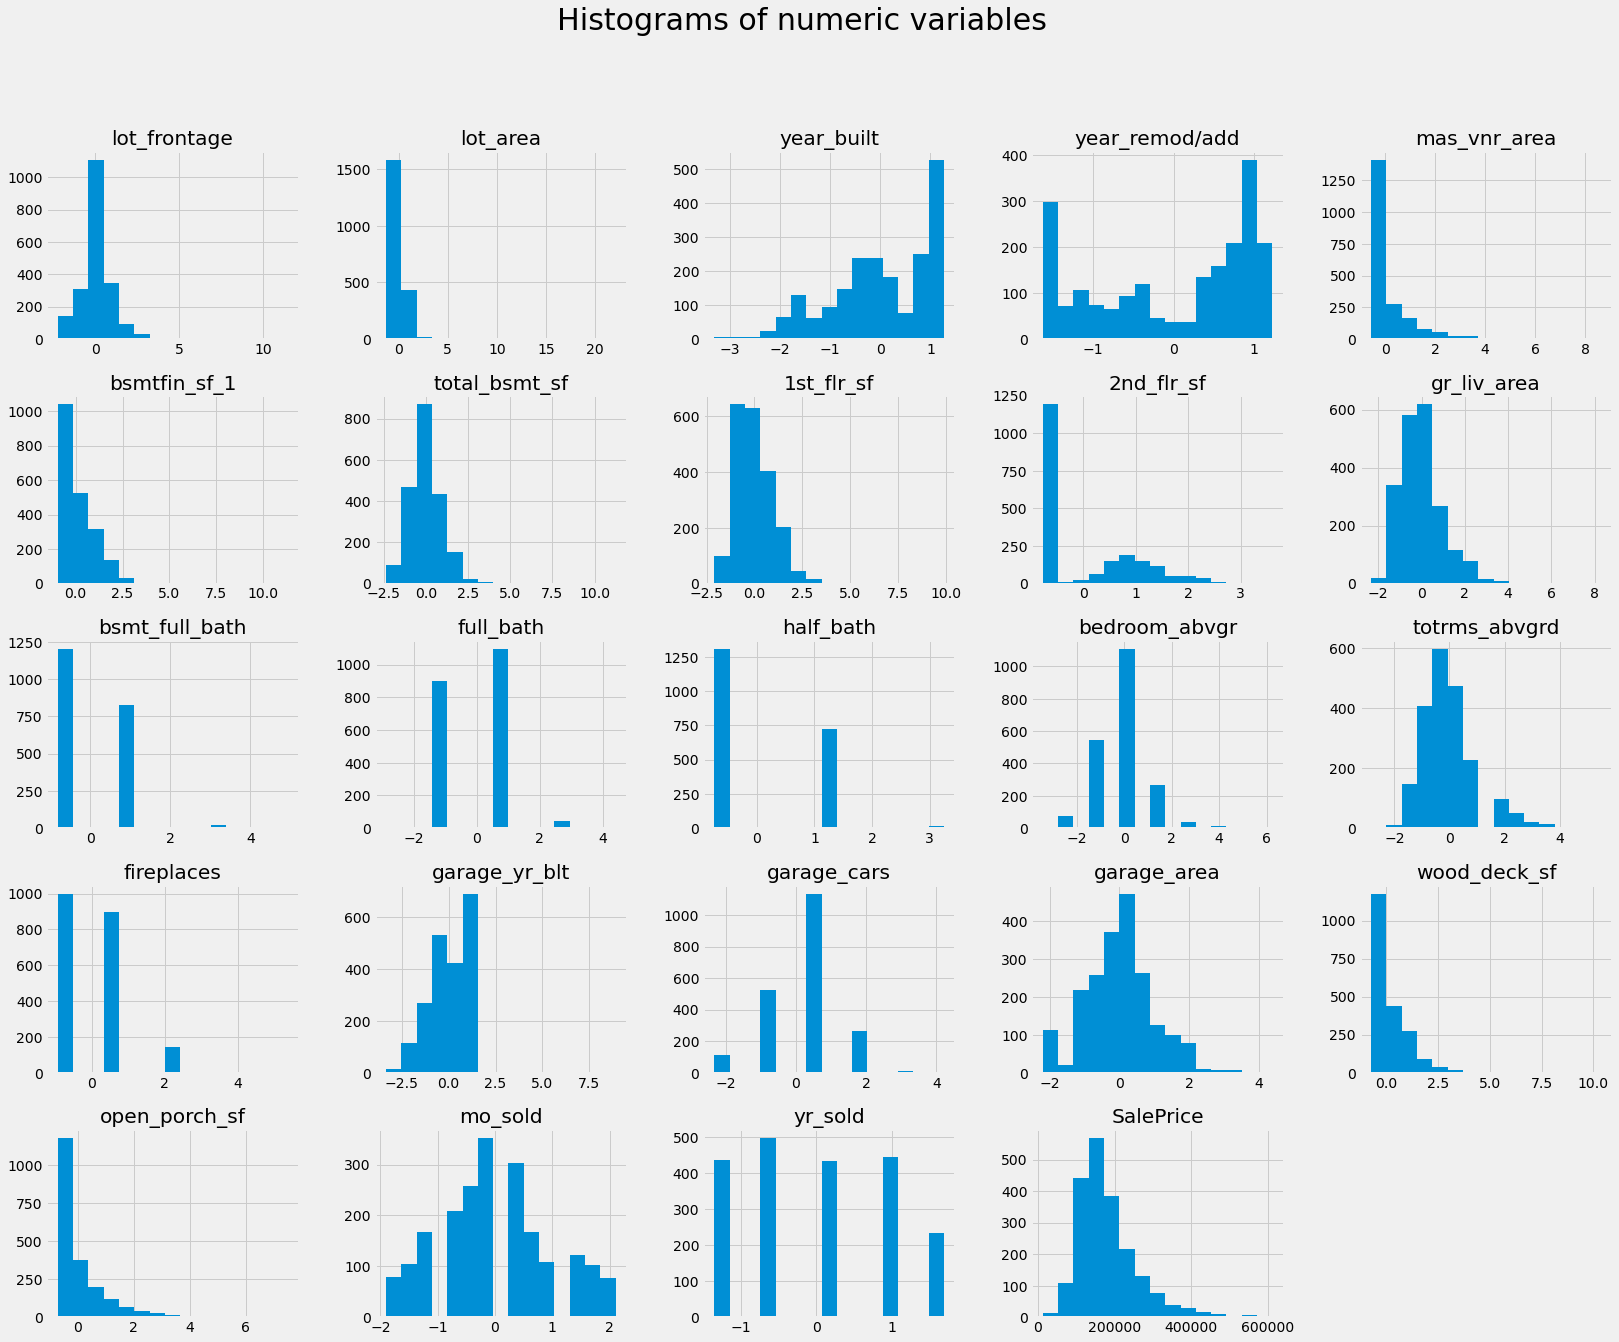

In [22]:
train_df_num.hist(figsize=(25,20), bins=15);
plt.suptitle('Histograms of numeric variables', fontsize=30)

## EDA on numeric dataframe

### Correlation between the features

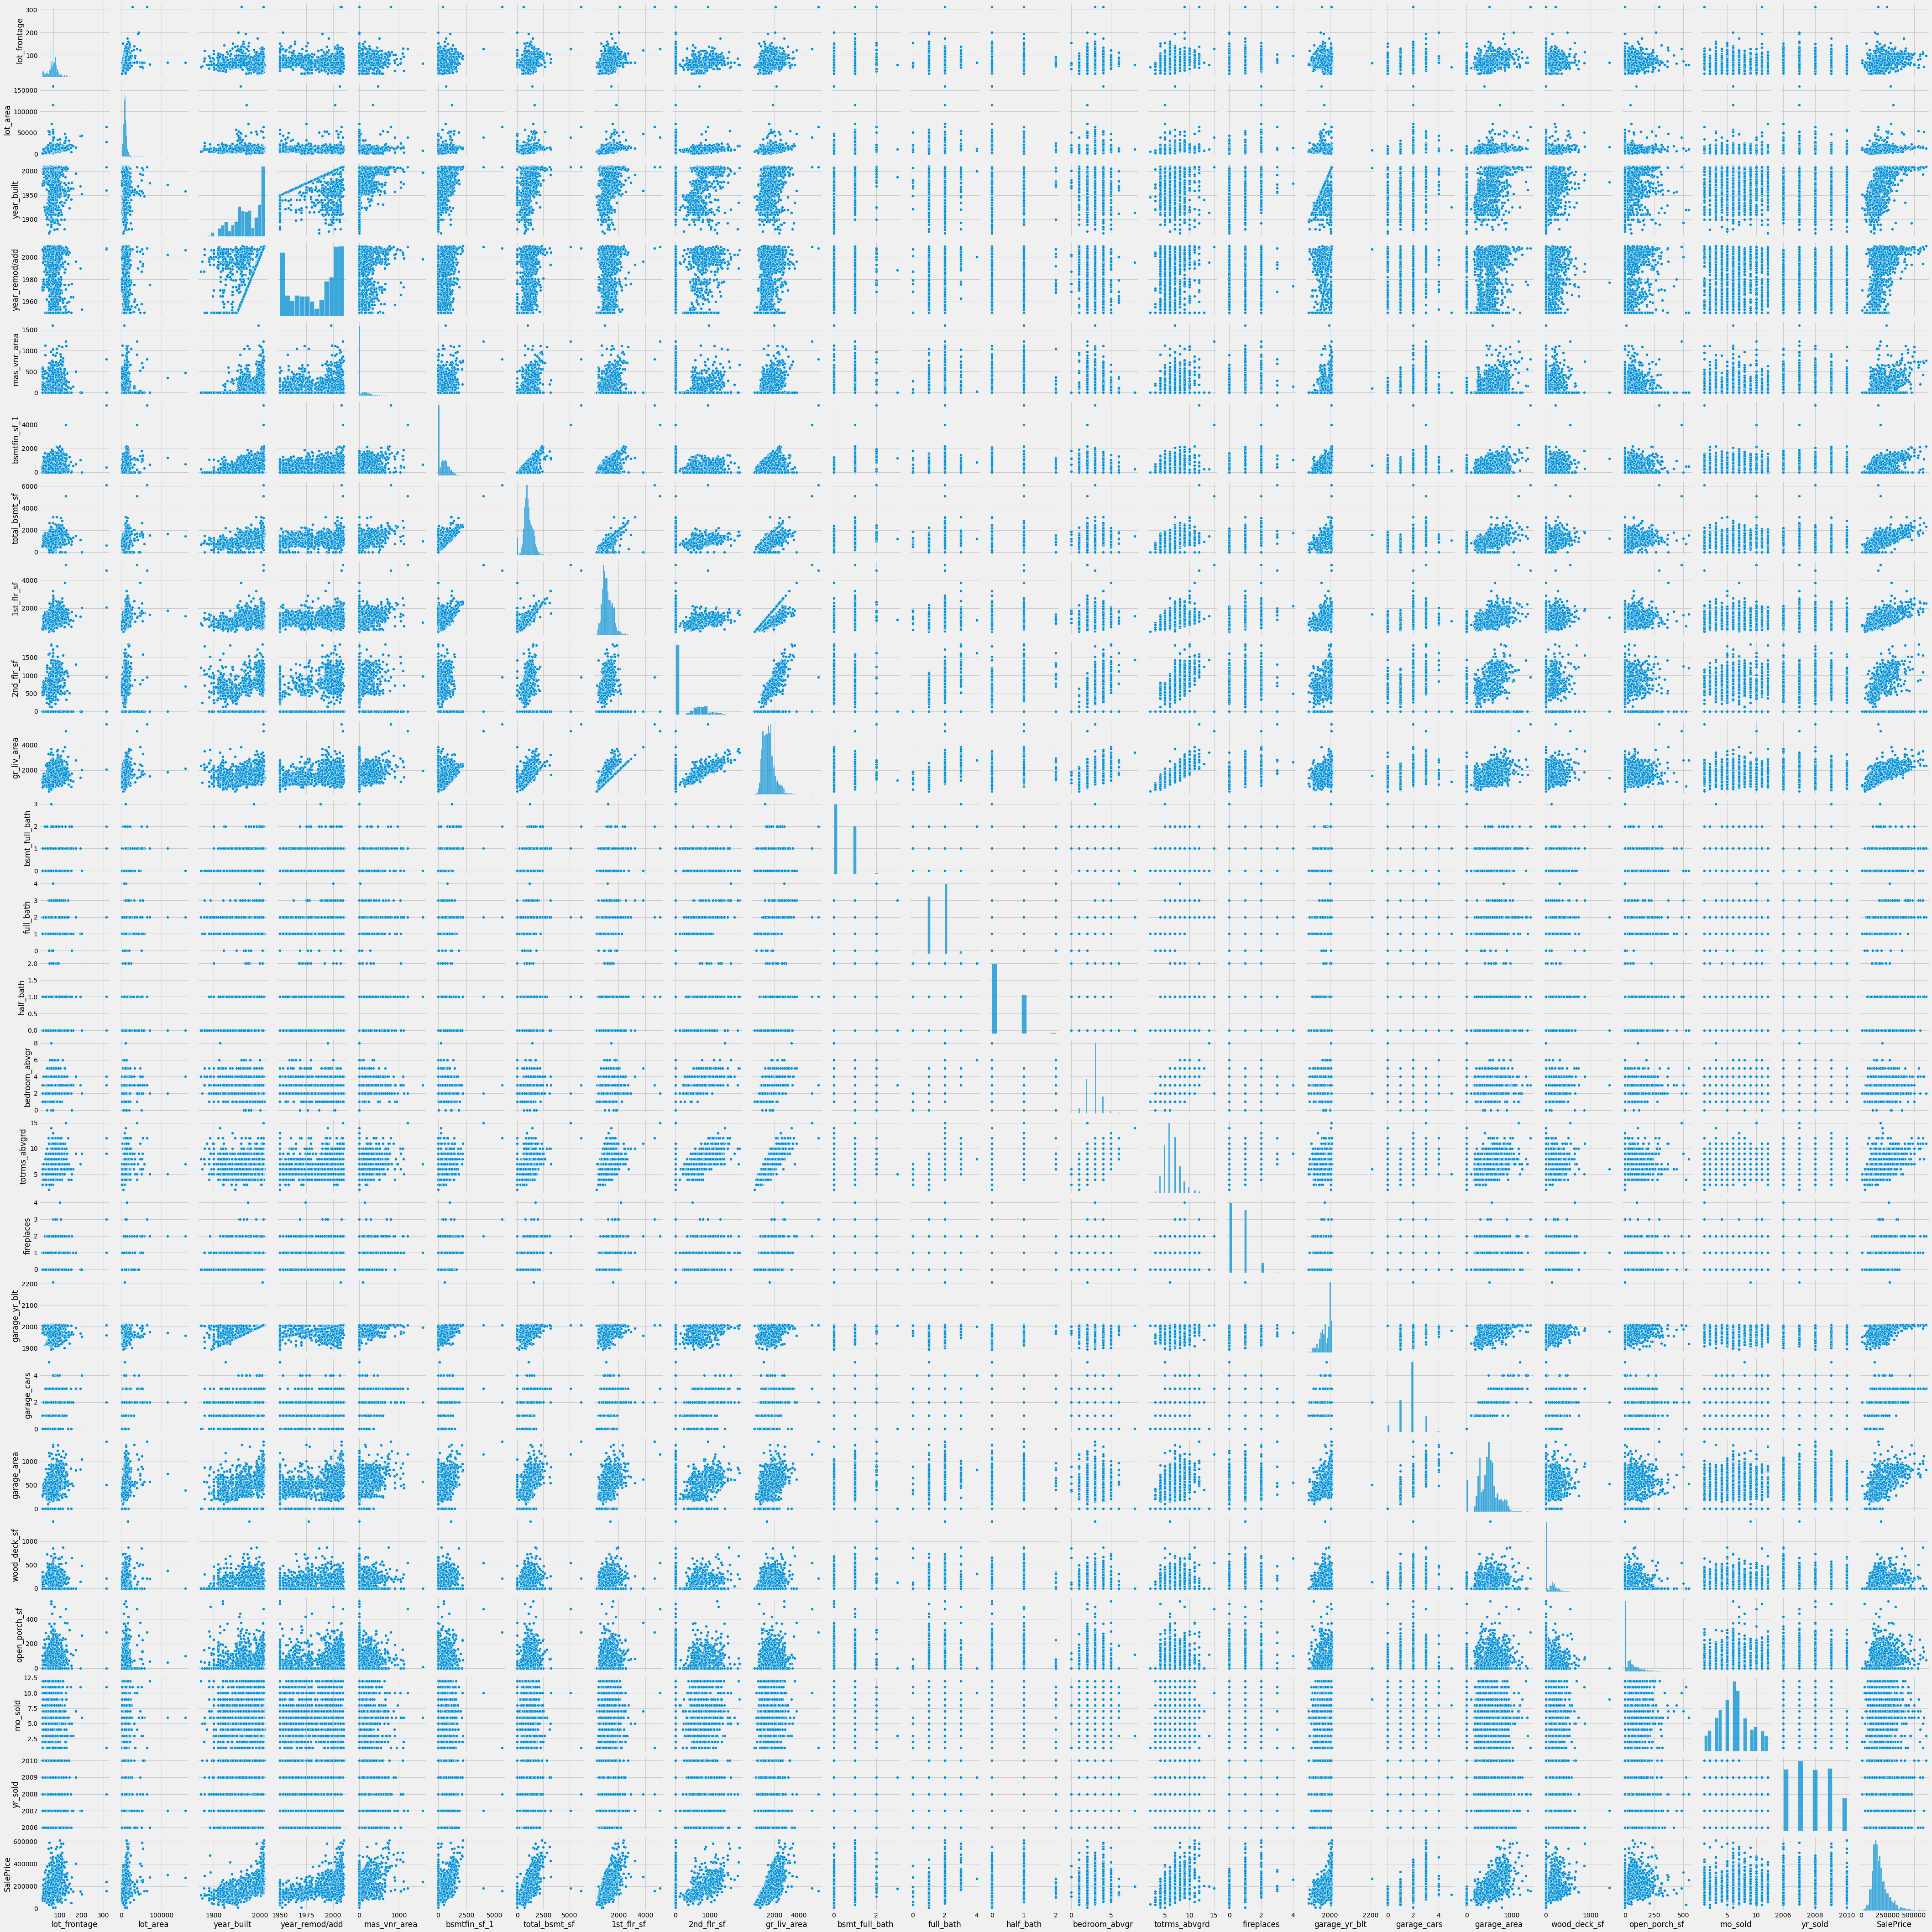

In [10]:
sns.pairplot(train_df_num)

Some notable attributes that have correlations from the pairplots are:
* lot_area
* lot_frontage
* bsmtfin_sf_1
* total_bsmt_sf
* mas_vnr_area
* 1st_flr_sf
* 2nd_flr_sf 	
* gr_liv_area
* garage_area

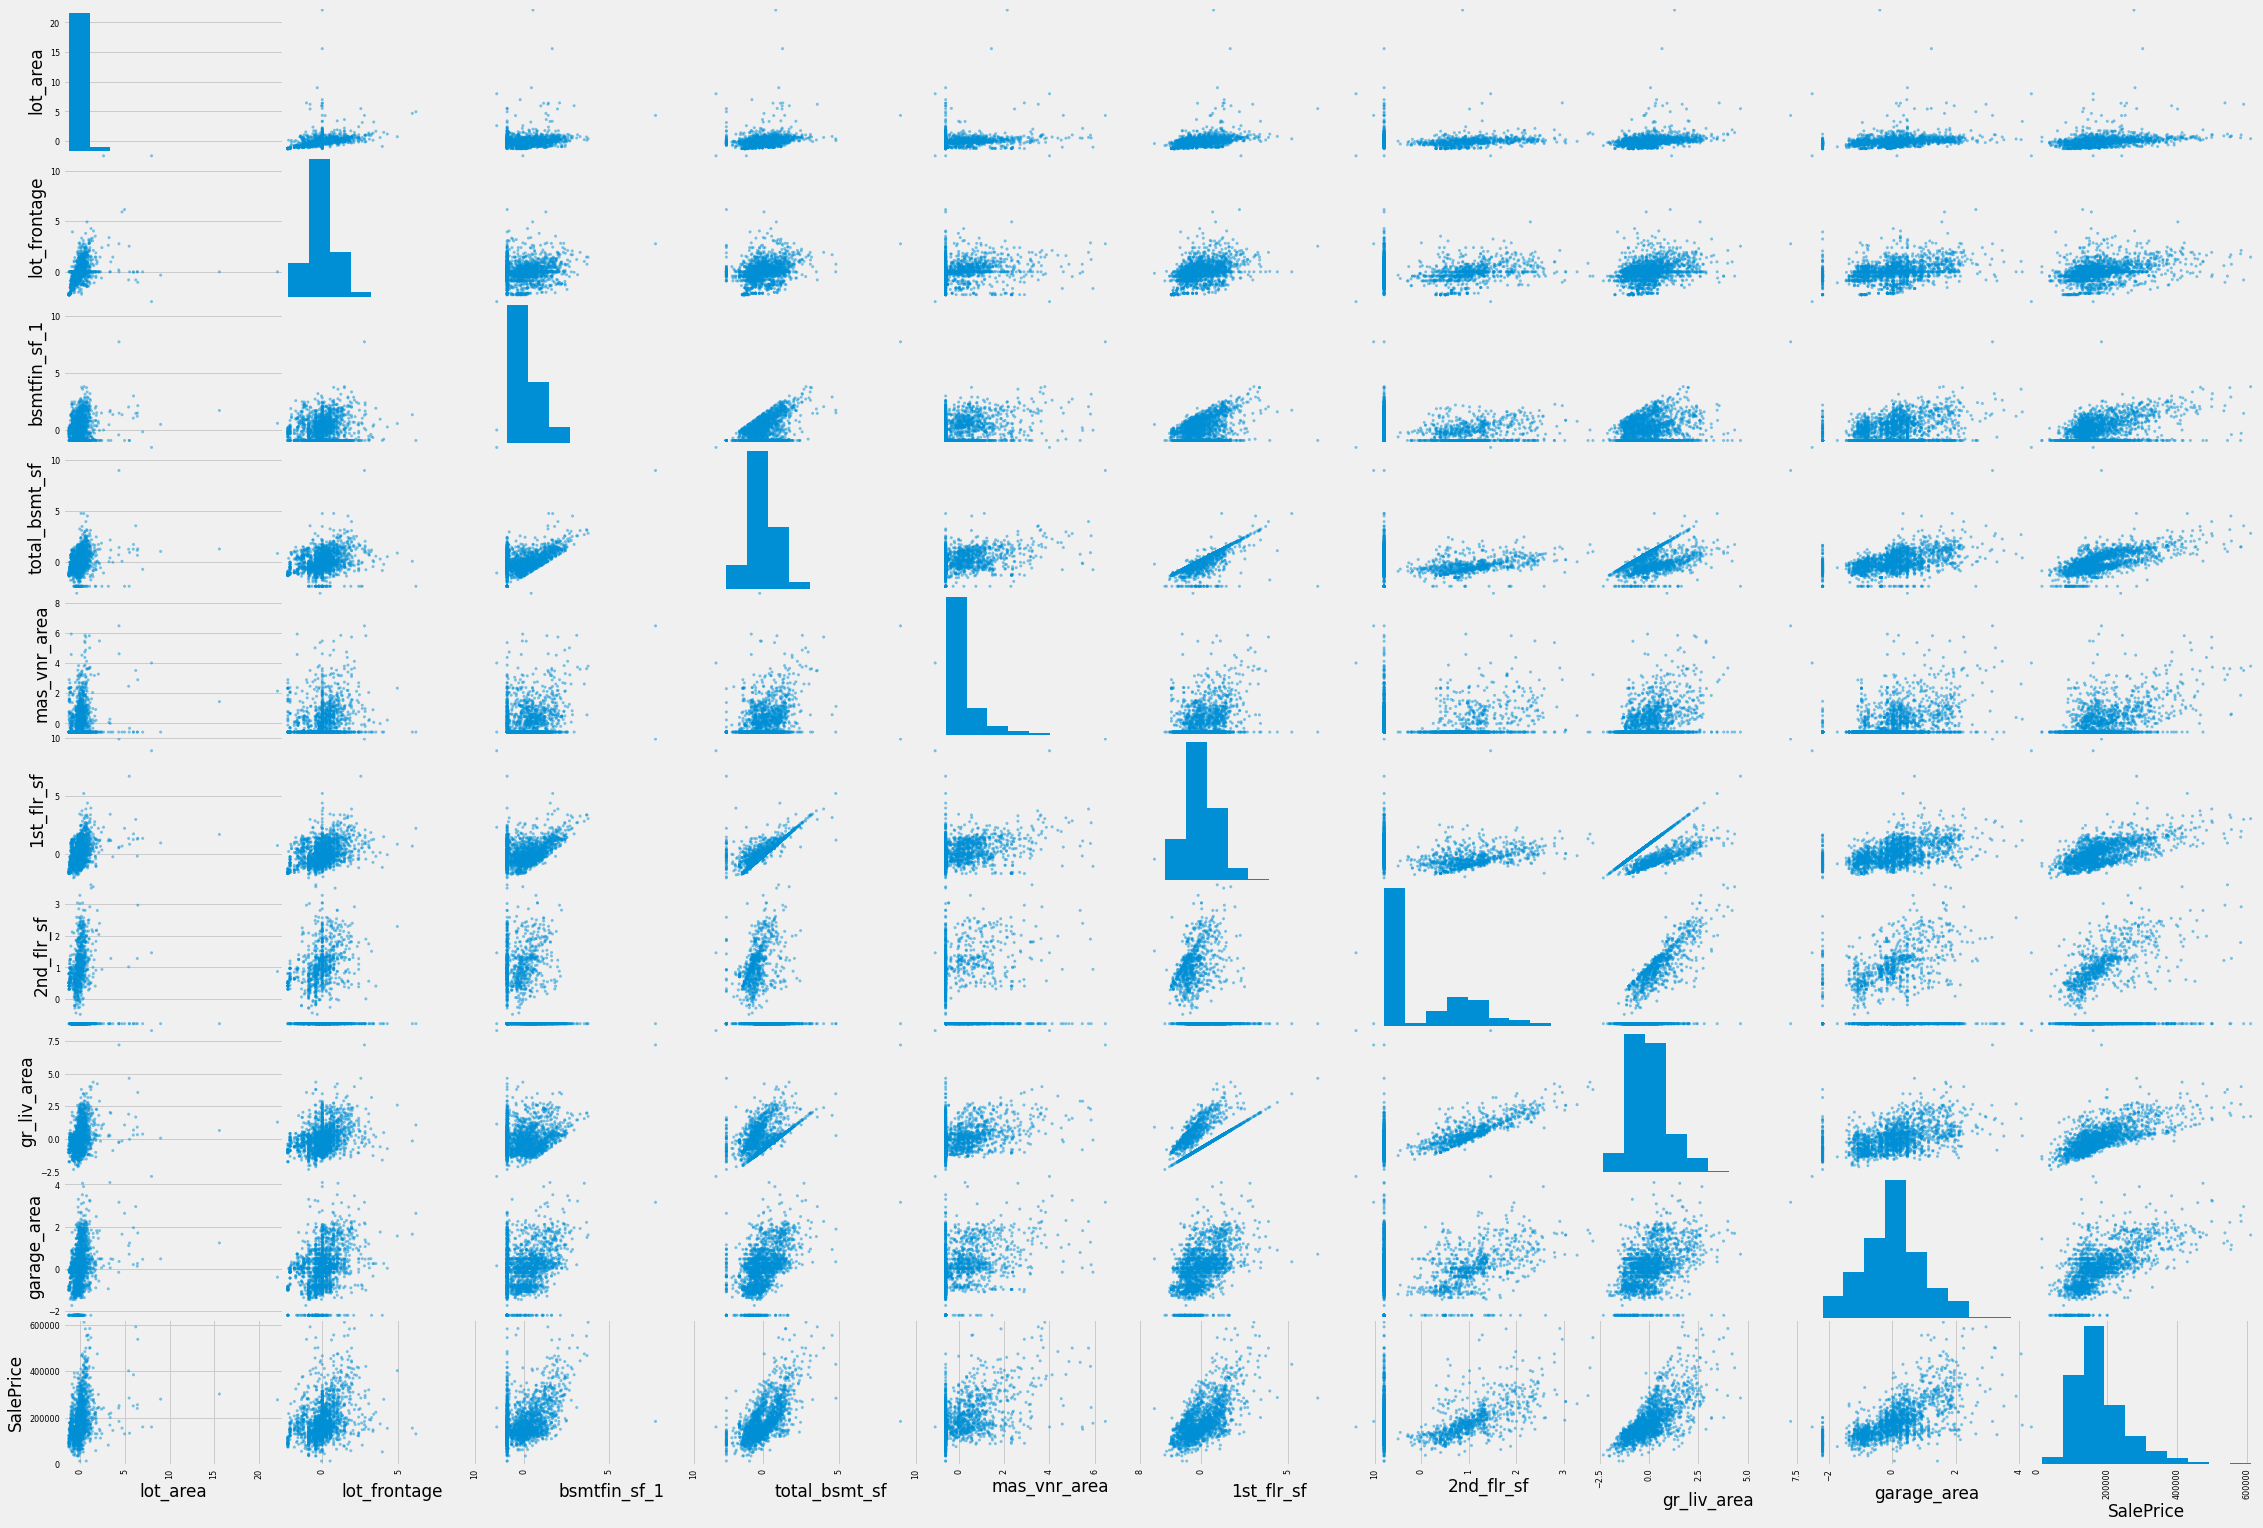

In [10]:
from pandas.plotting import scatter_matrix

attributes = [
    "lot_area",
    "lot_frontage",
    "bsmtfin_sf_1",
    "total_bsmt_sf",
    "mas_vnr_area",
    "1st_flr_sf",
    "2nd_flr_sf",
    "gr_liv_area",
    "garage_area",
    "SalePrice"
]

scatter_matrix(train_df_num[attributes], figsize=(35,25));

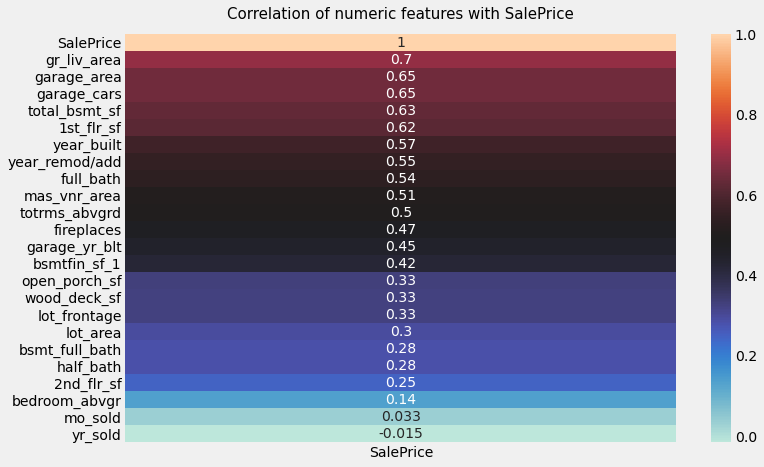

In [25]:
single_corr_heatmap(train_df_num,['SalePrice'])

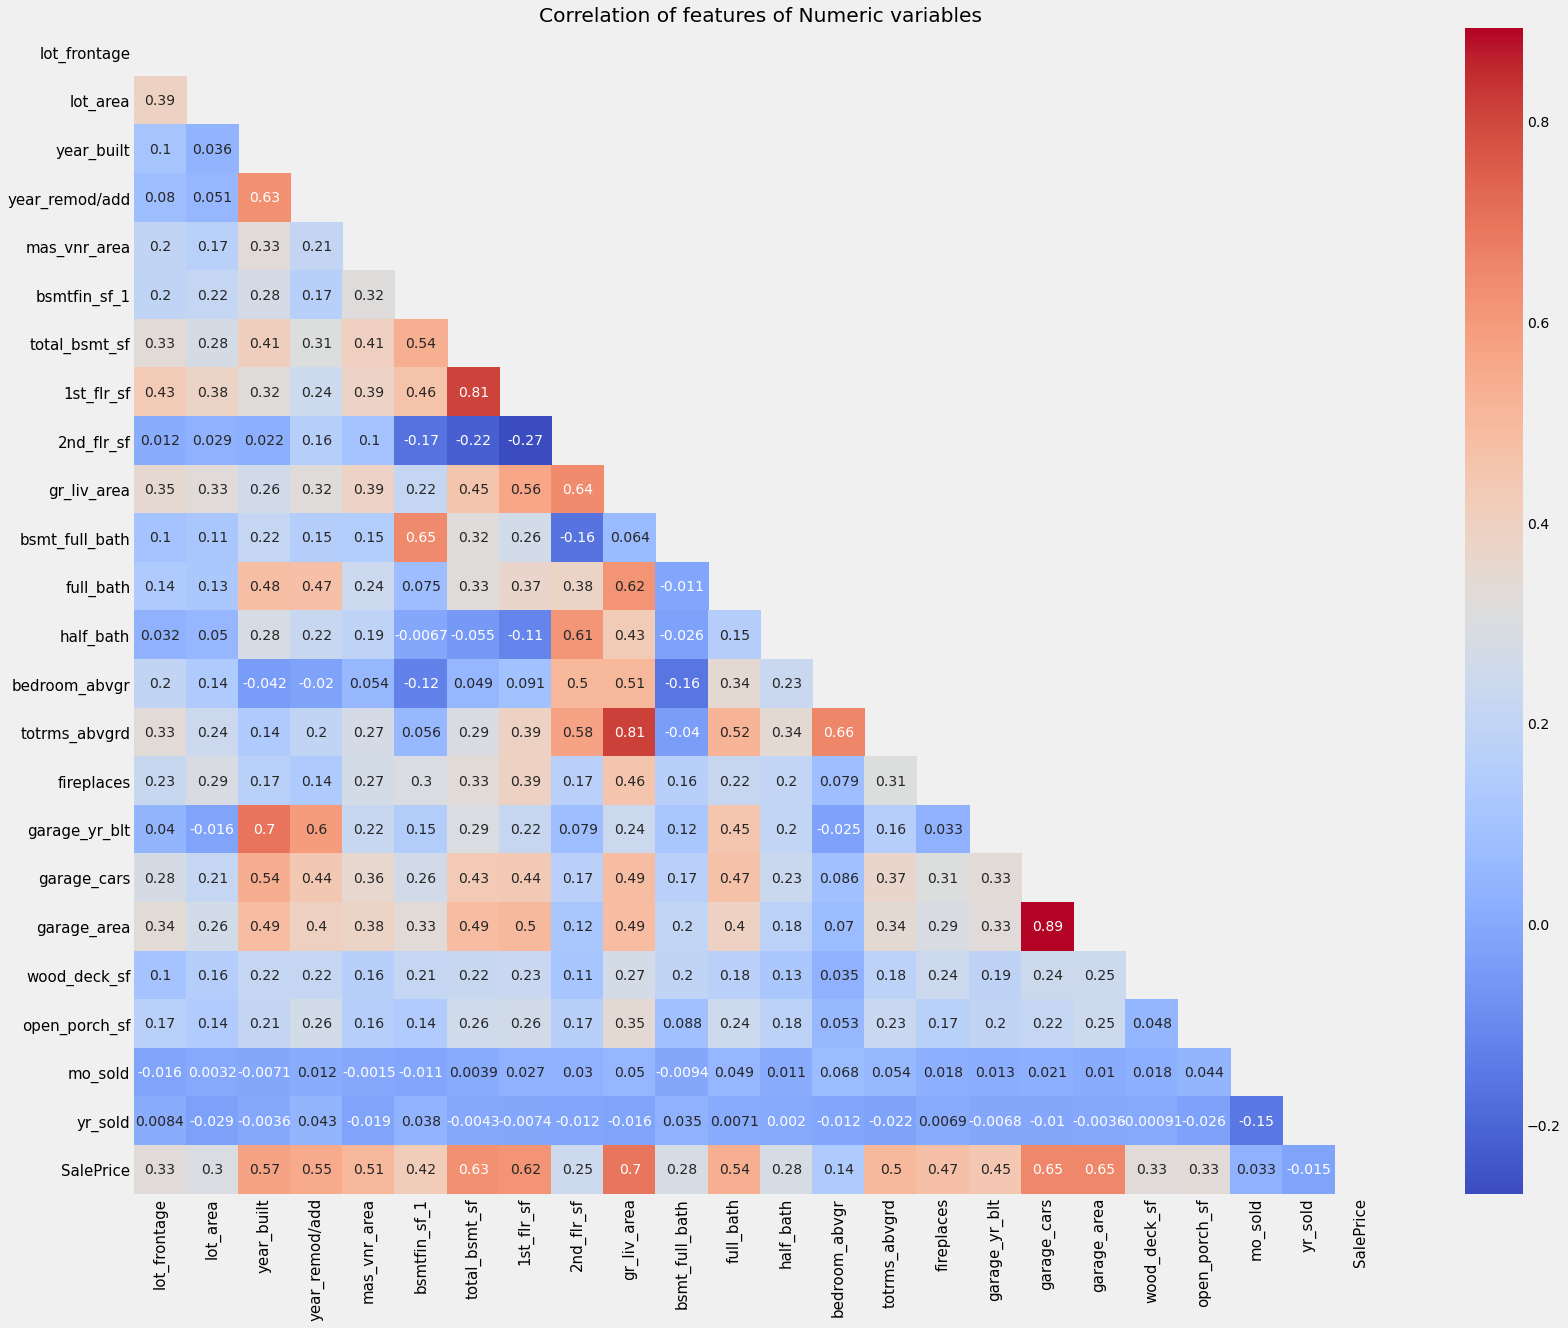

In [38]:
corr_heatmap(train_df_num, 'Numeric')

Any correlation of < 0.30 will be dropped, it looks like **bedroom_abvgr, mo_sold, yr_sold have very little correlation with the SalePrice**.

**mo_sold and yr_sold have a correlation of -0.15**. Possible to feature engineer them?

**bedroom_abvgr** has some correlation with **2nd_flr_sf** and **gr_liv_area**, 0.5 and 0.51 respectively**. Possible to feature engineer them?

In [44]:
train_df_num['mo_yr_sold'] = train_df_num['mo_sold'] * train_df_num['yr_sold']
train_df_num.head()

lot_frontage  lot_area  year_built  year_remod/add  mas_vnr_area  \
0      0.000189  0.512071    0.142227        0.989479      1.088083   
1     -1.223218  0.211664    0.805126        0.609090      0.185677   
2     -0.049573 -0.317944   -0.620106        1.084576     -0.573033   
3      0.185155 -0.039047    1.136575        1.084576     -0.573033   
4      0.607668  0.618586   -2.376787        0.418896     -0.573033   

   bsmtfin_sf_1  total_bsmt_sf  1st_flr_sf  2nd_flr_sf  gr_liv_area  \
0      0.196754      -0.741305   -1.108838    0.997894    -0.040634   
1      0.422361      -0.322775   -0.634510    2.067055     1.244529   
2      0.626274      -0.002199   -0.271195   -0.773859    -0.884084   
3     -0.959480      -1.500446   -1.060900    0.871004    -0.110588   
4     -0.959480      -0.850390   -0.841397    0.668921    -0.108589   

   bsmt_full_bath  full_bath  half_bath  bedroom_abvgr  totrms_abvgrd  \
0       -0.817494   0.769779   1.255611       0.189383      -0.279441   
1        1.096524   0.769779   1.255611       1.399426       1.002738   
2        1.096524  -1.051232  -0.740713       0.189383      -0.920531   
3       -0.817494   0.769779   1.255611       0.189383       0.361648   
4       -0.817494   0.769779  -0.740713       0.189383      -0.279441   

   fireplaces  garage_yr_blt  garage_cars  garage_area  wood_deck_sf  \
0   -0.925701      -0.163877     0.292216     0.006154     -0.730121   
1    0.640811       0.661562     0.292216     0.395351     -0.730121   
2   -0.925701      -1.067928    -1.016376    -1.054870     -0.730121   
3   -0.925701       1.054628     0.292216    -0.341343      0.047980   
4   -0.925701      -0.910702     0.292216     0.047854     -0.730121   

   open_porch_sf   mo_sold   yr_sold  SalePrice  mo_yr_sold  
0      -0.053301 -1.173402  1.695731     130500   -1.989774  
1       0.396266 -0.808979  0.933358     220000   -0.755068  
2       0.066584 -1.902247  1.695731     109000   -3.225700  
3      -0.712665 -0.808979  1.695731     174000   -1.371811  
4       0.171483 -1.173402  1.695731     138500   -1.989774

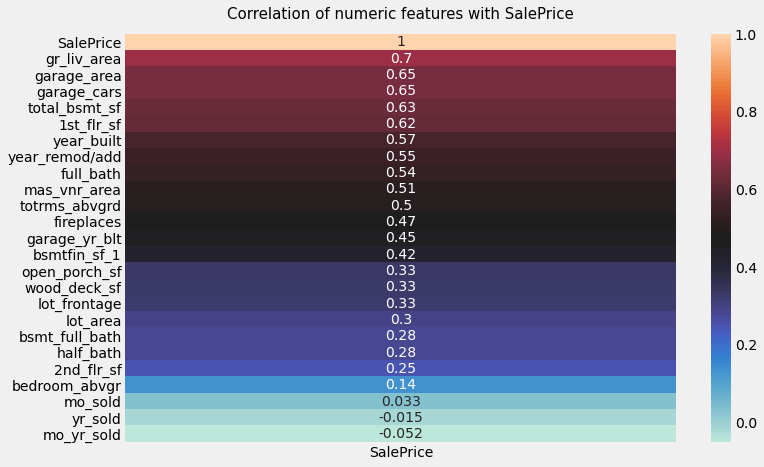

In [43]:
single_corr_heatmap(train_df_num,['SalePrice'])

Despite combining them, they still produce very little correlation. Will drop them

In [45]:
# Drop the poor correlation variables
train_df_num.drop(['mo_sold', 'yr_sold', 'mo_yr_sold'], axis=1, inplace=True)

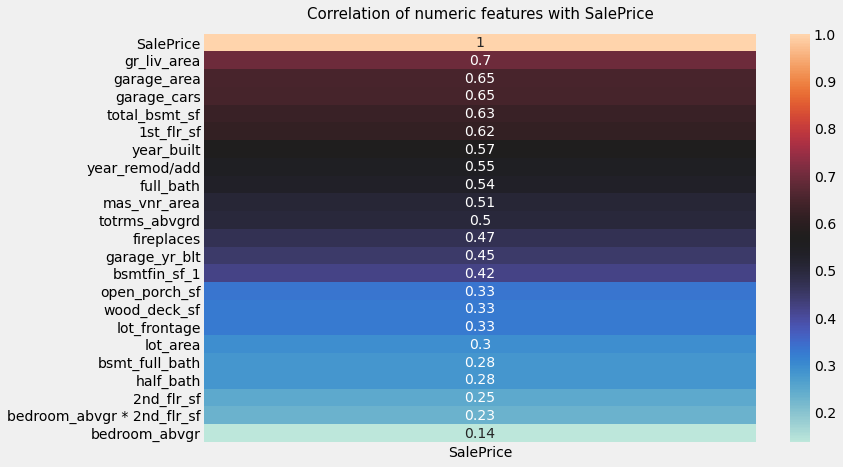

In [59]:
# bedroom_abvgr * 2nd_flr_sf
train_df_num['bedroom_abvgr * 2nd_flr_sf'] = train_df_num['bedroom_abvgr'] * train_df_num['2nd_flr_sf']
single_corr_heatmap(train_df_num,['SalePrice'])

A small increase in correlation, try out the gr_liv_area

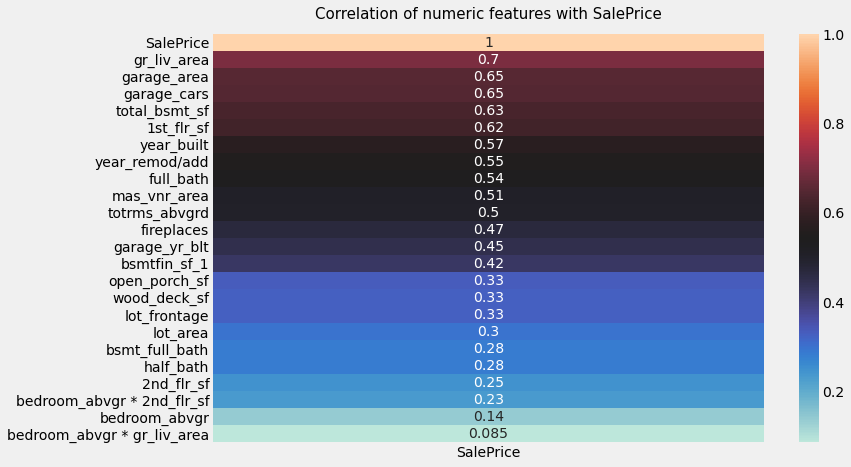

In [60]:
# bedroom_abvgr * gr_liv_area
train_df_num['bedroom_abvgr * gr_liv_area'] = train_df_num['bedroom_abvgr'] * train_df_num['gr_liv_area']
single_corr_heatmap(train_df_num,['SalePrice'])

That's did not do any better, with a correlation of 0.085

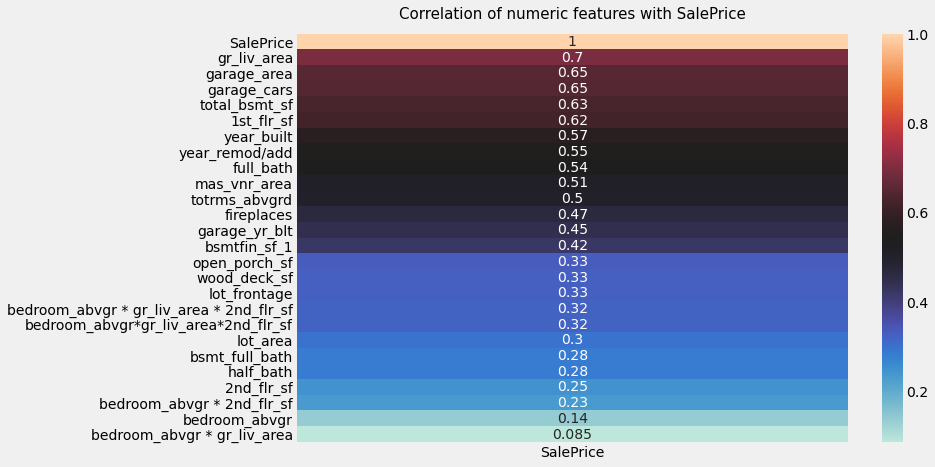

In [63]:
train_df_num['bedroom_abvgr*gr_liv_area*2nd_flr_sf'] = train_df_num['bedroom_abvgr'] * train_df_num['gr_liv_area'] * train_df_num['2nd_flr_sf']
single_corr_heatmap(train_df_num,['SalePrice'])

The three interaction term did much better than any of the 2 combinations. Will drop bedroom_abvgr and keep the `'bedroom_abvgr*gr_liv_area*2nd_flr_sf'`

In [65]:
train_df_num = train_df_num.drop(['bedroom_abvgr', 'bedroom_abvgr * gr_liv_area', 'bedroom_abvgr * 2nd_flr_sf', 'bedroom_abvgr*gr_liv_area*2nd_flr_sf'], axis=1)

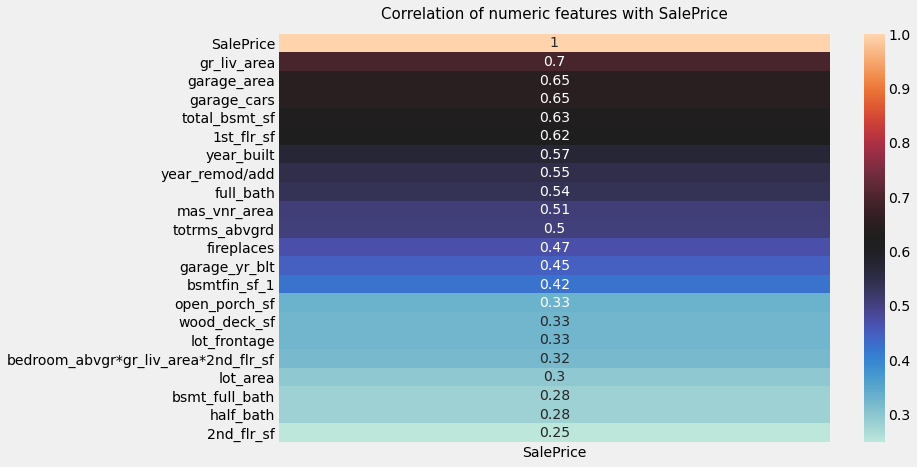

In [72]:
single_corr_heatmap(train_df_num,['SalePrice'])

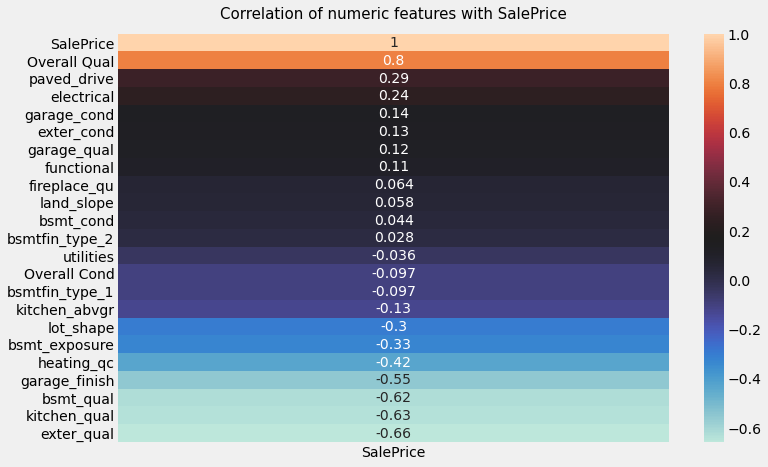

In [78]:
single_corr_heatmap(train_df_ord, ['SalePrice'])

In [12]:
def lmplots(dataframe, x, y, title, xlabel = None, ylabel = None):    
    sns.lmplot(x=x, y=y, data=dataframe, aspect=2, height=6, ci=None, scatter_kws={'color':'darkred'}, line_kws={'color':'green'})
        # Set titles, labels, etc here for each subplot
    plt.title(title, fontsize=15, pad=15)
#     plt.xticks(ticks=np.arange(450,700,25), labels=[str(x) for x in np.arange(450,700,25)])
    plt.xlabel(xlabel, fontsize=12, labelpad=20)
    plt.ylabel(ylabel, fontsize=12, labelpad=20)

In [13]:
def boxplots(dataframe, list_of_cols, title='test', figsize=(15,7), c='red'):
    plt.figure(figsize=figsize)
    sns.boxplot(data=dataframe[list_of_cols], orient='h', color=c, whis=1.5)
    
    plt.title(title, fontsize=20)
    plt.xlabel(list_of_cols[0] + ' values', labelpad=20)
#     plt.xticks(ticks=tick_list.tolist(), labels=[str(i) for i in tick_list]) # Ticks = np.arange(25,300,25)
#     plt.xlim(10,400)
#     plt.yticks(ticks=[i for i in range(len(list_of_cols))],labels=list_of_cols)
#     plt.ylabel('Lot Frontage')

In [14]:
tick_list = np.arange(20,370,10)
tick_list

array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140,
       150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270,
       280, 290, 300, 310, 320, 330, 340, 350, 360])

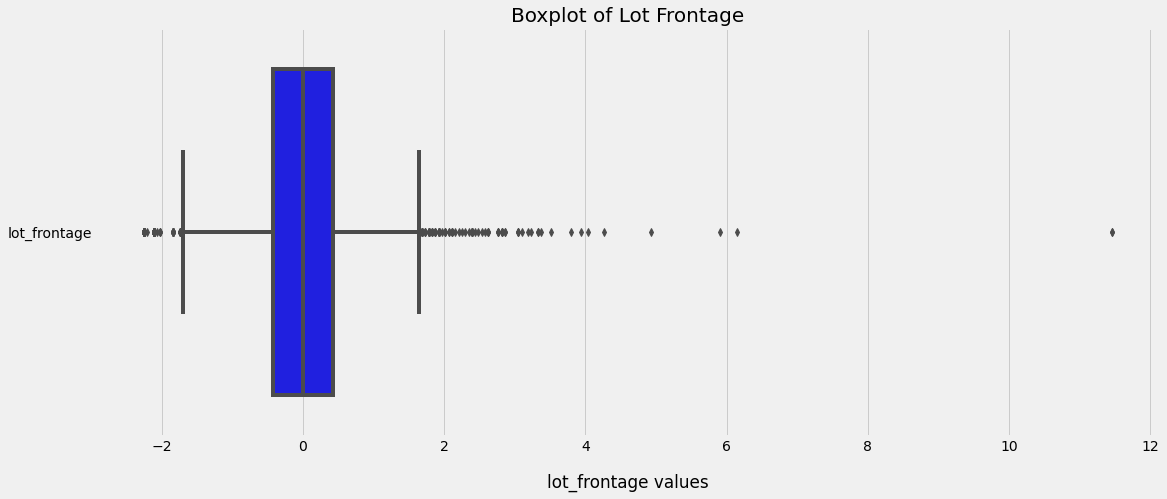

In [15]:
boxplots(train_df_num, ['lot_frontage'], 'Boxplot of Lot Frontage',(17,7), 'blue')
# plt.xticks(ticks=tick_list.tolist(), labels=[str(i) for i in tick_list]); # Ticks = np.arange(25,300,25)
# plt.xlim(20,350)

<AxesSubplot:title={'center':'Histogram of lot frontage'}, ylabel='Frequency'>

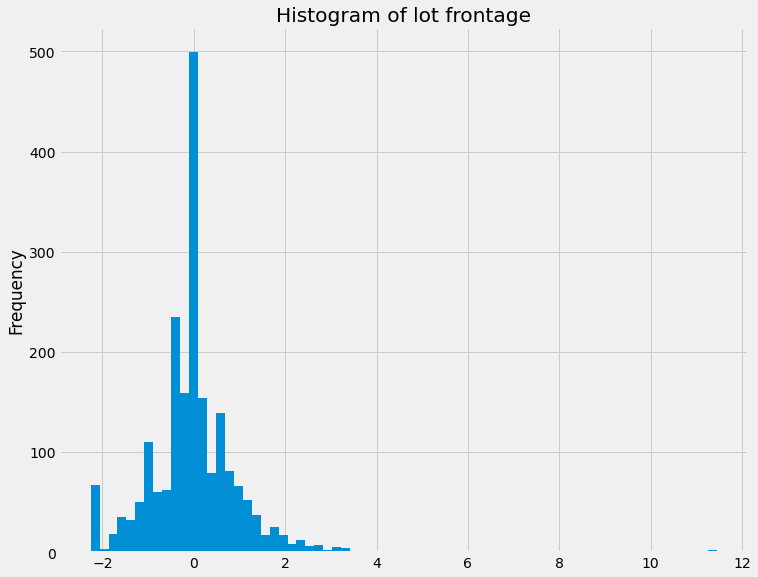

In [68]:
train_df_num['lot_frontage'].plot(kind='hist', bins=70, figsize=(11,9), title='Histogram of lot frontage')

Most values fall between 60 ~ 80.

There are some outliers in lot_frontage

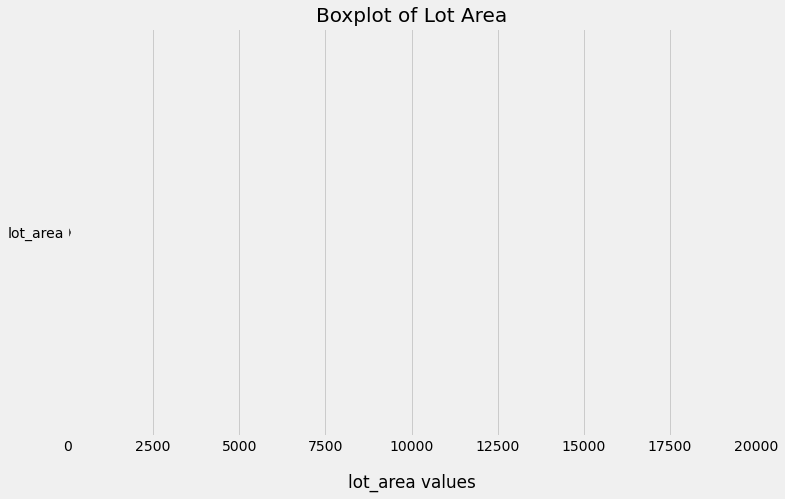

In [17]:
# Boxplot of Lot area
tick_list = np.arange(1050,20000,350)
boxplots(train_df_num, ['lot_area'], 'Boxplot of Lot Area', (11,7), 'blue')
# plt.xticks(ticks=tick_list.tolist(), labels=[str(i) for i in tick_list], fontsize=15);
plt.xlim(0,20000);

<AxesSubplot:title={'center':'Histogram of lot area'}, ylabel='Frequency'>

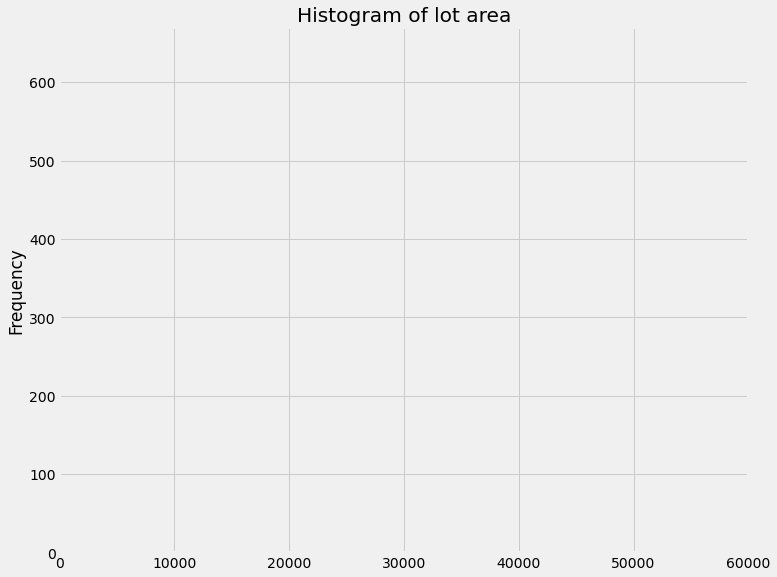

In [18]:
train_df_num['lot_area'].plot(kind='hist', bins=70, figsize=(11,9), xlim=(0,60000), title='Histogram of lot area')
# plt.xticks(ticks=tick_list.tolist(), labels=[str(i) for i in tick_list], fontsize=15);

Most values of lot area fall between 7500 ~ 11550

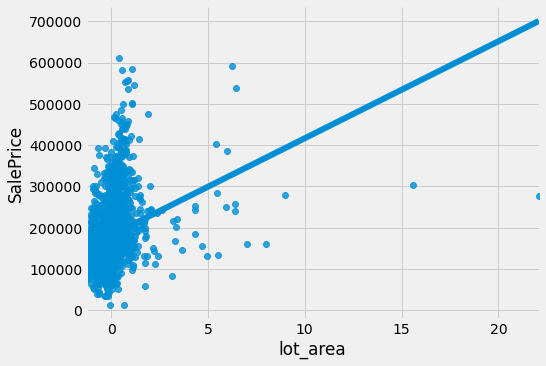

In [19]:
sns.lmplot(x='lot_area', y='SalePrice', data=train_df_num, aspect=1.5, ci=None);
# plt.title('Scatterplot between lot_frontage and SalePrice', title=5)

# Clearly the outliers are affecting the line of best fit, need to drop them.

In [20]:
np.corrcoef(x=train_df_num['lot_area'], y=train_df_num['SalePrice'])[0][1]

0.29656583236677886

There is a correlation of about **0.4 between lot_area and lot frontage**

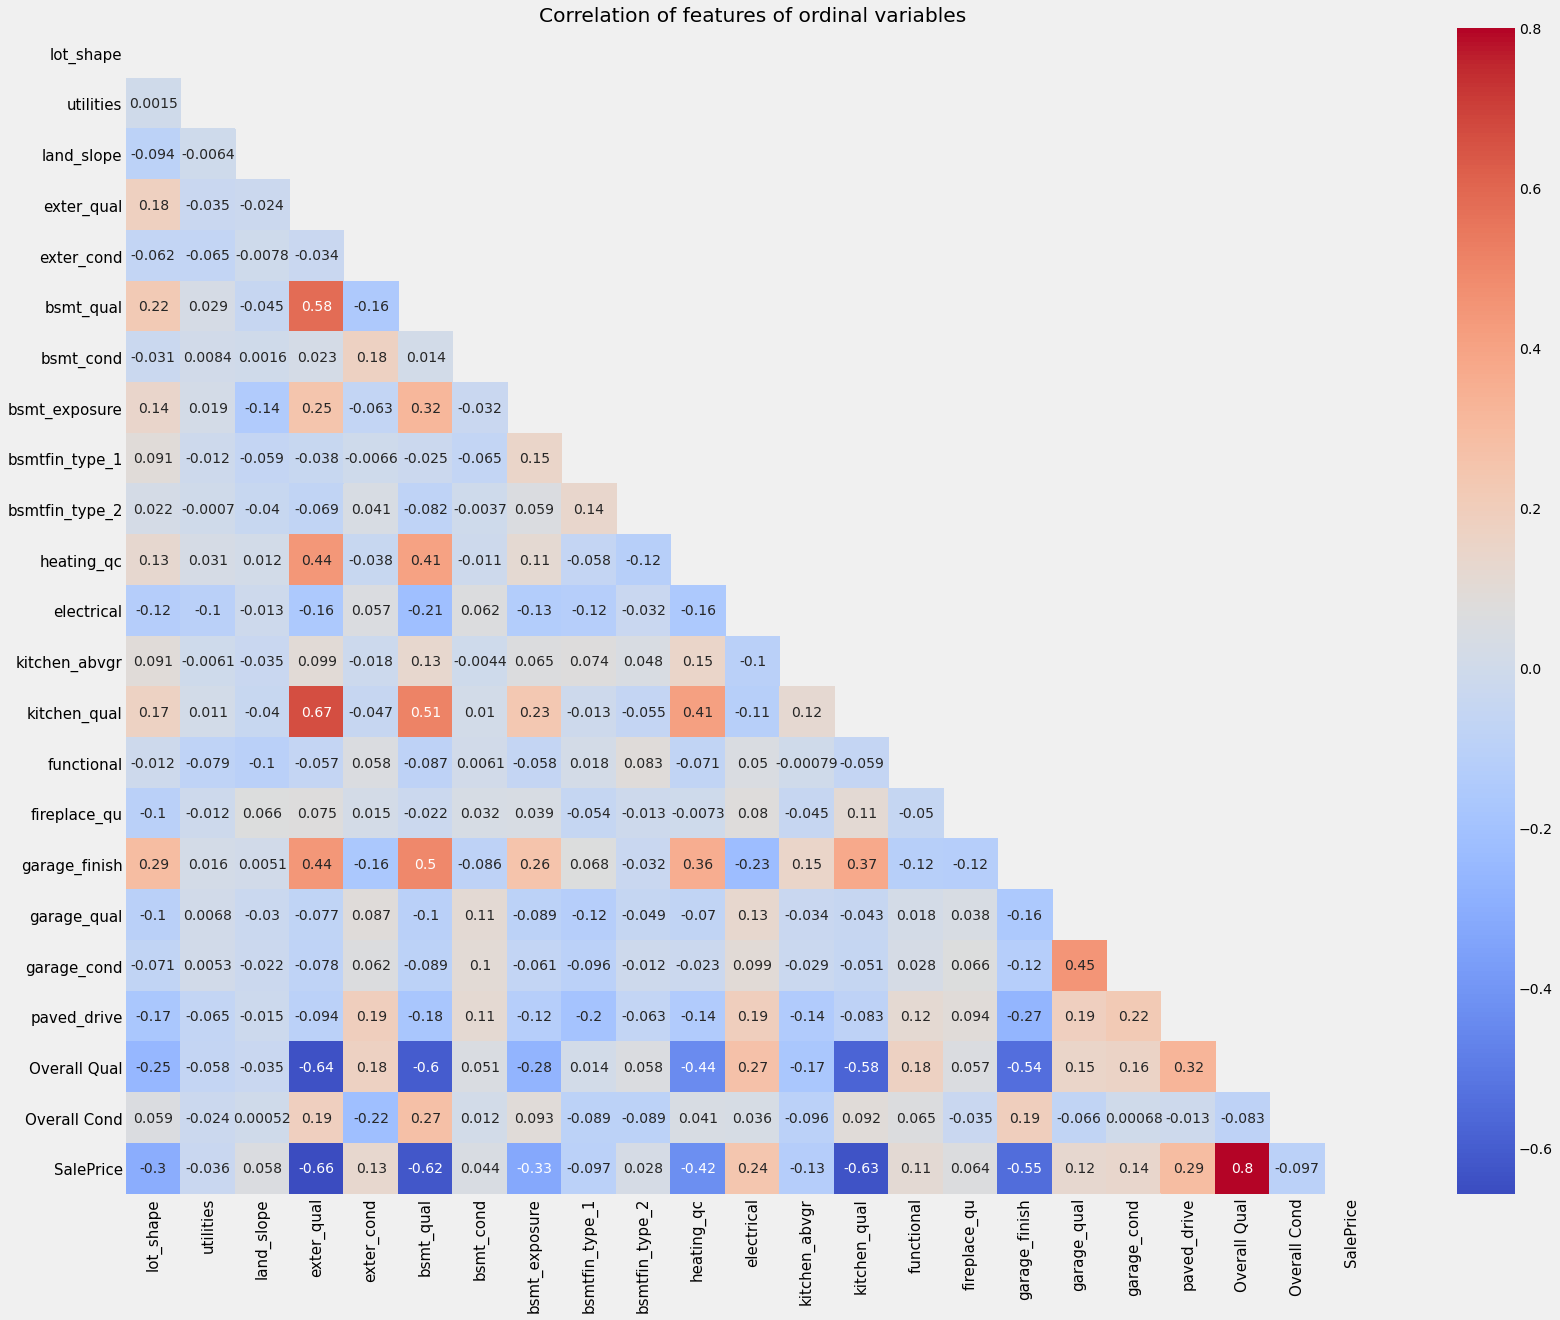

In [28]:
# Plotting the heatmap for train_df_cat_ord
corr_heatmap(train_df_ord, 'ordinal')

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### Drop the outliers with square feet of over 4000

In [ ]:
# Plotting the Gr Live Area with Sale price
plt.figure(figsize=(12,7))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=train_df_num)

In [ ]:
# Rows with Above Grade Living Area Square Ft, drop them as they're outliers
train_df['Gr Liv Area'][train_df['Gr Liv Area'] > 4000]

In [ ]:
# Drop the outliers
train_df_num = train_df_num.drop(index=[960, 1995])
train_df_num.head()

In [ ]:
plt.figure(figsize=(25,15))
sns.pairplot(final_train_df)

## In Summary

**SAT tests**

The participation rate for SAT increases significantly for **Colorado** from 11% in 2017 to 100%. This also lead to a decrease in test scores for SAT.

The other states do not differ as much.

**Illinois** has a large increase in SAT participation with a 1000% increase in sat participation from 2017 to 2018


**ACT tests**

**Colorado** faced the biggest decline in participation rates of act 100% in 2017 to 30% in 2018.

Largest increase in participation rate for **Ohio** with about 33% increase in participation rates


**Do any states show have >50% participation on both tests either year?**

Only 3 states, Florida, Georgia and Hawaii showed more than 50% participation rates in both tests and years.

This shows that most students will take either 1 of the tests due to either time or financial constraints.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [ ]:
# mask = np.zeros_like(df.corr())
# mask[np.triu_indices_from(mask)] = True

# plt.figure(figsize=(20,9))
# sns.heatmap(df.corr(),cmap='viridis',annot=True, mask = mask, annot_kws={'size':12})
# plt.title('Correlation between xxx and yyy attributes', fontsize=25)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

# plt.show()

From the heatmap, there's high negative correlation between SAT and ACT participation rate with -84% in 2017 and -85% in 2018. This translates to states with high SAT participation rates are more likely to have low ACT participation rates, vice versa.

There's an interesting correlation between the score and participation rates. For SAT, the correlation between average total score and participation was -87% in 2017 and -79% in 2018. For ACT, the correlations were -86% in 2017 and -86% in 2018. This shows that the higher the participation, the lower the average total score. This is likely due to students who show greater interest taking the test in cases of low participation and the scores being lower for cases in high participation as the range of student skills become wider.



#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [ ]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels = None, bins=8, sup_title=None,lw=2):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    if len(list_of_columns) > 2:
        figsize=(15,14)
    else:
        figsize=(11,7)
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=figsize) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.suptitle(sup_title, fontsize=20)
    
    # Calculating Mean, Median and Mode
    mean = dataframe[list_of_columns].mean()
    median = dataframe[list_of_columns].median()
    mode = dataframe[list_of_columns].mode().min()
    
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        color_lst = ['green', 'red', 'purple', 'yellow']
        #ax[i].hist(dataframe[column],bins=8, color=color) # feel free to add more settings
        sns.histplot(x=dataframe[column], data=dataframe, bins=bins, color = color_lst[i], ax=ax[i])
        # Set titles, labels, etc here for each subplot
        
        # Plotting the Axes vline
        ax[i].axvline(mean[i], color='magenta', label='mean', lw=lw)
        ax[i].axvline(median[i], color='blue', label='median', lw=lw)
        ax[i].axvline(mode[i], color='black', label='mode', lw=lw)
        
        ax[i].set_title(list_of_titles[i], fontsize=15)
        ax[i].set_xlabel(list_of_xlabels, fontsize=15)
        ax[i].set_ylabel('State Count')
        ax[i].legend(['Mean', 'Median', 'Mode'])

In [ ]:
# Plotting the histograms for each numeric variable
# plt.figure()
train_df_num.hist(figsize=(20,18), bins=15);

In [ ]:
# Showing the scatterplot against Sale Price for all numeric variables
# plt.figure(figsize=(25,25))
g = sns.pairplot(data=train_df_num, y_vars='SalePrice')
g.fig.set_size_inches(45,15)

In [ ]:
plt.figure(figsize=(11,7))
sns.boxplot(x='MS SubClass', y='SalePrice', data=train_df_num)

In [ ]:
sns.boxplot(x='Kitchen AbvGr', y='SalePrice', data=train_df_num)

In [ ]:
sns.scatterplot(x='MS SubClass', y='SalePrice', data=train_df_num);

In [ ]:
train_df_num_corr = pd.concat([train_df_num, train_df['SalePrice']], axis=1)

single_corr_heatmap(train_df_num_corr, ['SalePrice'], 'Blues_r')

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

## Plotting the participation rates for SAT and ACT 2017 and 2018

In [ ]:
subplot_histograms(final_sat_act, ['sat_17_participation', 'sat_18_participation', 'act_17_participation', 'act_18_participation'],
                   ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018'], 'Participation rates', 
                   sup_title='SAT and ACT participation rate')

In [ ]:
final_sat_act[['act_17_participation', 'act_18_participation']].agg(['mean', 'median'])

Most of the participation rate is between **0-10%** for **SAT**.

There seems to be about **25%** increase in SAT participation from 2017 to 2018 judging from the *mean values*.

Participation rate for **ACT** is much higher compared to SAT. Also, the participation rates do not differ as much year to year.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


## SAT and ACT 2017 math scores

In [ ]:
lmplots(final_sat_act, 'sat_17_math', 'act_17_math', 
        'SAT and ACT 17 math scores', 'SAT 2017 math scores', 
        'ACT 2017 math scores')

The scatter points are dispersed and a negative line of best fit is plotted. This shows a negative weak correlation between the variables.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

## SAT and ACT participation box plots

In [ ]:
def boxplots(dataframe, title, xlabel = None, yticklabels = None, palette='coolwarm'):    
    plt.figure(figsize=(11,7))
    sns.boxplot(data=dataframe, orient='h', palette=palette, width=0.5)
        # Set titles, labels, etc here for each subplot
    plt.title(title, fontsize=20, pad=15)
    plt.xlabel(xlabel, labelpad=20, fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(ticks=[tick for tick in range(len(dataframe.columns))], labels= yticklabels, fontsize=15)
    plt.show()

In [ ]:
all_part = final_sat_act[['sat_17_participation', 'sat_18_participation', 'act_17_participation', 'act_18_participation']]
boxplots(all_part, 'Participation rates for SAT and ACT test', 'Participation rates in (%)', ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018'], palette='viridis')

# Merge Dataframes

Join the train_df_num, train_df_cat_nom, train_df_cat_ord dataframes and assigned this to final_train_df.

In [ ]:
#Code:
# combined_2017 = sat_2017.merge(act_2017,on='state')
# combined_2017.head()
final_train_df = pd.concat([train_df_num, train_df_cat_nom, train_df_cat_ord], axis=1)
final_train_df.head()

In [ ]:
# No null values found in the final train df
final_train_df[final_train_df.isnull().any(axis=1)]

In [ ]:
# No more null values
final_train_df.isnull().sum().sum()

In [ ]:
# Checking if there are any SalePrice in the column
final_train_df.columns.str.contains('SalePrice').sum()

In [ ]:
# No duplicated columns
final_train_df.columns.duplicated().sum()

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

The skewness of the data, right / left skewed? 

The spread of the data, your standard deviation. (look at your histogram)

Central Tendency - Mean, Median, Mode

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Based on my analysis, the three states that I've chosen to investigate Colorado, Illinois and Arkansas. Colorado's SAT participation rate has increased from 11% to 100% from 2017 to 2018 while their ACT participation rate has decreased from 100% to 30%. A similiar trend was found in Illinois where the participation rate has increased from 9% in 2017 to to 99% in 2018 while their ACT participation rate has decreased from 93% to 43%. Arkansas' participation rate for SAT remains the lowest year-to-year while their participation rate for ACT tests is one of the highest.

Colorado state officials switched from the mandatory ACT to the mandatory SAT which resulted in a decrease in ACT participation and an increase in SAT participation. The reason behind the switch is that the Colorado Department of Education (CDE) remarked the exam is more closely aligned to the state's academic standards and to prepare them for life after high school. (1) (2)

According to the Chicago Tribune, Illinois State Board of Education (ISBE) made the switch as well from ACT the SAT after weighing the attributes of both exams and decided SAT's standards was better aligned with Illinois. (3)

For both states, the average scores for SAT decreases significantly as a greater number of students took the test while the average scores for the ACT increased as a result of a smaller group of students taking it. For instance, Colorado's SAT scores went from 1201 in 2017 to 1025 in 2018 while the ACT average score went from 20.8 in 2017 to 23.9 in 2018.

In Arkansas, the ACT is used as an admission requirement to enter colleges or universities which is why there's a a very high participation rate for ACT and it's considered an "ACT state". (4) (5)

### References

* [Testive](https://www.testive.com/colorado-sat-change-2017/) (1) 

* [Chalkbeat](https://co.chalkbeat.org/2017/8/17/21100853/sat-scores-show-mixed-results-on-whether-colorado-juniors-are-on-track-for-college) (2)

* [Chicagotribune](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html) (3)

* [University of Arkansas](https://admissions.uark.edu/apply/test-scores/index.php) (4)

* [Arkansas Department of Education](http://dese.ade.arkansas.gov/divisions/learning-services/assessment/the-act) (5)

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

After reviewing the state college entrance exam testing policy and examining the datasets, there is clear evidence that the respective state's policy has a huge influence in the student's participation in these tests. Currently, there are 25 states that require students to take the [SAT or ACT](https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html).

For the tests participation to increase, states can choose to enact a policy of making one of the two tests a mandatory high school graduation requirement if they have not done so. This provides benefits to the state's education systems and to the students. One advantage would be that the standardized test can be used to measure the effectiveness of the high-school educational systems. It can also be used to benchmark students and provides students the guidance to complete one common college application requirement. This will be useful in guiding students to consider their school of choice.  

Let's look at Illinois, where students are mandated to take a standardized test to enter colleges and universities. After Illinois State Board of Education (ISBE) reviewed both tests,  ISBE switched to SAT from ACT. This resulted a large decrease in ACT participation and a large increase in SAT participation from 2017 to 2018. These changes in participation were followed by a decrease in average score for the SAT and an increase in ACT average scores. This shows what happens when a state make a test mandatory - a large drop in the participation rate of the other test.

To resolve this, states need to provide incentives to encourage students to take both tests. Incentives such as giving students time off for test taking, subsidizing the fees and integrating the test into high school curriculum can help to remove the barriers.

Research into other factors such as the median household incomes for each state to see if there's any corrleations into the participation rates would be useful to increase the participation rates.